##  Bank Marketing


**Abstract:** 
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe to a term deposit account (dependent variable y).

**Data Set Information:**
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

## Project Description:
The project (Code) analyzes the prior marketing campaign data of a Portugeuse bank and aims to predict whether the customer will subscribe to fixed-term deposit products the bank is offering. The code cleans the data, imputes the missing values, and analyzes and compares different predictive models. The best predictive model is used for the prediction exercise.

Comments and Explanations (in the form of Markdown) are included in the notebook to improve the readability of the code, to explain the rationale of doing certain steps and to discuss the results and inferences from the executed code.


###  Attribute Information:

####  Bank client data:

 - Age (numeric)
 - Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
 - Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
 - Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school',  'illiterate', 'professional.course', 'university.degree', 'unknown')
 - Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
 - Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
 - Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

    
####  Related with the last contact of the current campaign:

 - Contact: contact communication type (categorical:
   'cellular','telephone')
 - Month: last contact month of year (categorical: 'jan', 'feb', 'mar',
   ..., 'nov', 'dec')
 - Day_of_week: last contact day of the week (categorical:
   'mon','tue','wed','thu','fri')
 - Duration: last contact duration, in seconds (numeric). BE VERY CAREFUL WITH THIS FIELD. Important
   note: this attribute highly affects the output target (e.g., if
   duration=0 then y='no'). Yet, the duration is not known before a call
   is performed. Also, after the end of the call y is obviously known.
   Thus, this input should only be included for benchmark purposes and
   should be discarded if the intention is to have a realistic
   predictive model.

    
####  Other attributes:

 - Campaign: number of contacts performed during this campaign and for
   this client (numeric, includes last contact)
 - Pdays: number of days that passed by after the client was last
   contacted from a previous campaign (numeric; 999 means client was not
   previously contacted)
 - Previous: number of contacts performed before this campaign and for
   this client (numeric)
 - Poutcome: outcome of the previous marketing campaign (categorical:
   'failure','nonexistent','success')

    
####  Social and economic context attributes
 - Emp.var.rate: employment variation rate - quarterly indicator
   (numeric)
 - Cons.price.idx: consumer price index - monthly indicator (numeric)
 - Cons.conf.idx: consumer confidence index - monthly indicator
   (numeric)
 - Euribor3m: euribor 3 month rate - daily indicator (numeric)
 - Nr.employed: number of employees - quarterly indicator (numeric)

####  Output variable (desired target):

 - y - has the client subscribed a term deposit? (binary: 'yes', 'no')

     
###  Source:

 - Dataset from : http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#


In [1]:
%load_ext autoreload
%autoreload 2
from datetime import datetime
start_time = datetime.now()

# Libraries to install
# %pip install xgboost
# %pip install plotnine
# %pip install mlxtend

# try this instead if pip doesn't work
# %conda install -c conda-forge plotnine
# %conda install -c conda-forge xgboost
# %conda install -c conda-forge mlxtend


from plotnine import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

print('LOAD DURATION: ', datetime.now() - start_time) # load time about a minute

LOAD DURATION:  0:00:03.432995


In [2]:
data = pd.read_csv('bank-additional-full.csv', sep = ';')
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
data.shape

(41188, 21)

In [4]:
# take a look at the type, number of columns, entries, null values etc..
data.info()
# bank.isnull().any() # one way to search for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
data.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [6]:
# Summary statistics
summary = pd.DataFrame(index = data.columns)
summary['Data type'] = data.dtypes.values
summary['# Nonnull records'] = data.count().values
summary['# Non-zero records'] = data.astype(bool).sum(axis=0)
summary['% Populated'] = round(data.count()/data.shape[0]*100,2)
summary['# Unique values'] = data.nunique().values
summary['Mean'] = round(data.mean(),2)
summary['Std'] = round(data.std(),2)
# summary['Min'] = round(data.min(),2)
# summary['Max'] = round(data.max(),2)
summary

,Data type,# Nonnull records,# Non-zero records,% Populated,# Unique values,Mean,Std
age,int64,41188,41188,100.0,78,40.02,10.42
job,object,41188,41188,100.0,12,NaN,NaN
marital,object,41188,41188,100.0,4,NaN,NaN
education,object,41188,41188,100.0,8,NaN,NaN
default,object,41188,41188,100.0,3,NaN,NaN
housing,object,41188,41188,100.0,3,NaN,NaN
loan,object,41188,41188,100.0,3,NaN,NaN
contact,object,41188,41188,100.0,2,NaN,NaN
month,object,41188,41188,100.0,10,NaN,NaN
day_of_week,object,41188,41188,100.0,5,NaN,NaN


In [7]:
categorical_fields = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
numerical_fields = ['age','duration','campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx','cons.conf.idx','euribor3m',
                      'nr.employed']
data[numerical_fields].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
data.shape

(41188, 21)

In [9]:
# data.duplicated().sum(axis=0)

In [10]:
# delete the duplicate rows if you want
data_duplicates = data[data.duplicated(keep='last')]
data_duplicates.shape

(12, 21)

In [11]:
# data.drop_duplicates(inplace=True) # is this the right call, are duplicates always redundant?
# data.shape

In [12]:
data['y'] = data['y'].map({'yes': 1, 'no': 0})
Y = pd.DataFrame(data['y'])

In [13]:
Y.rename(columns={'y':'label'}, inplace=True)

In [14]:
Y.head()

,label
0,0
1,0
2,0
3,0
4,0


In [15]:
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [16]:
goods = data[data['y'] == 1]
bads = data[data['y'] == 0]
num_goods = len(goods)
num_bads = len(bads)
rate = num_goods / len(data)
print('overall response rate is: ', rate)

overall response rate is:  0.11265417111780131


In [17]:
s = pd.Series(np.ones(1000))

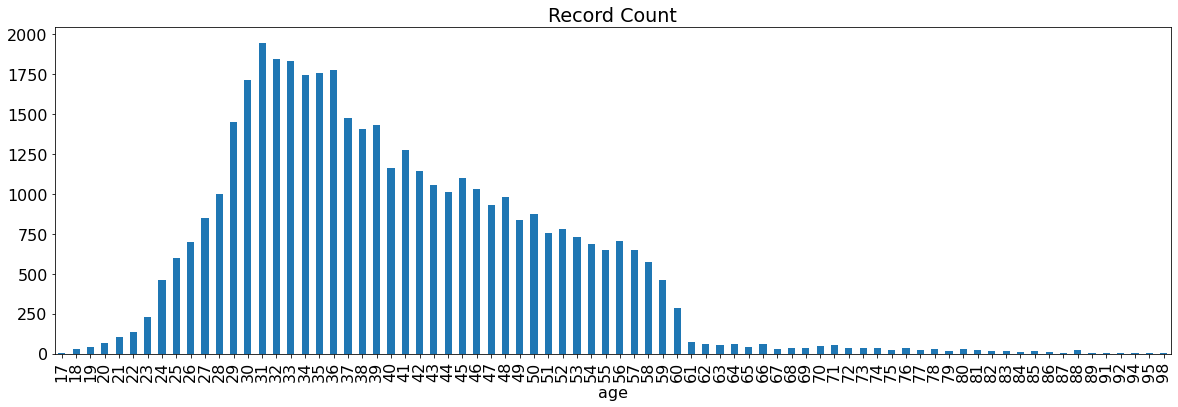

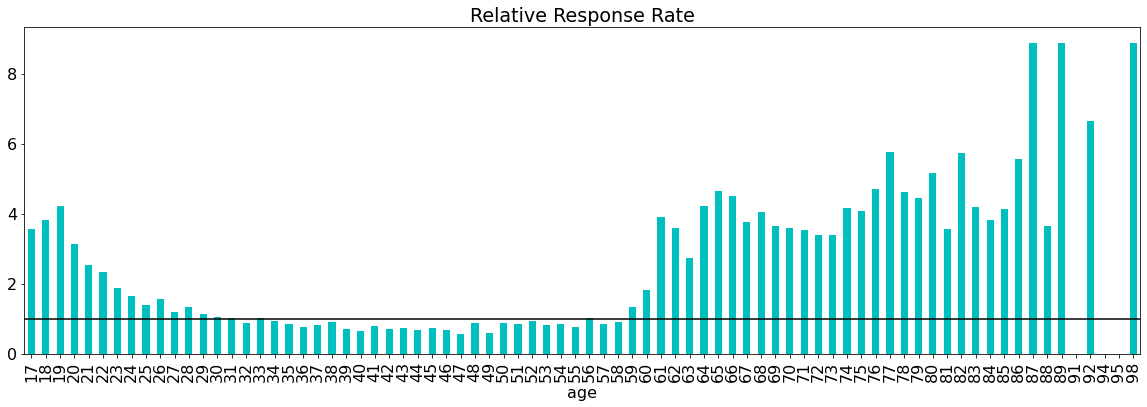

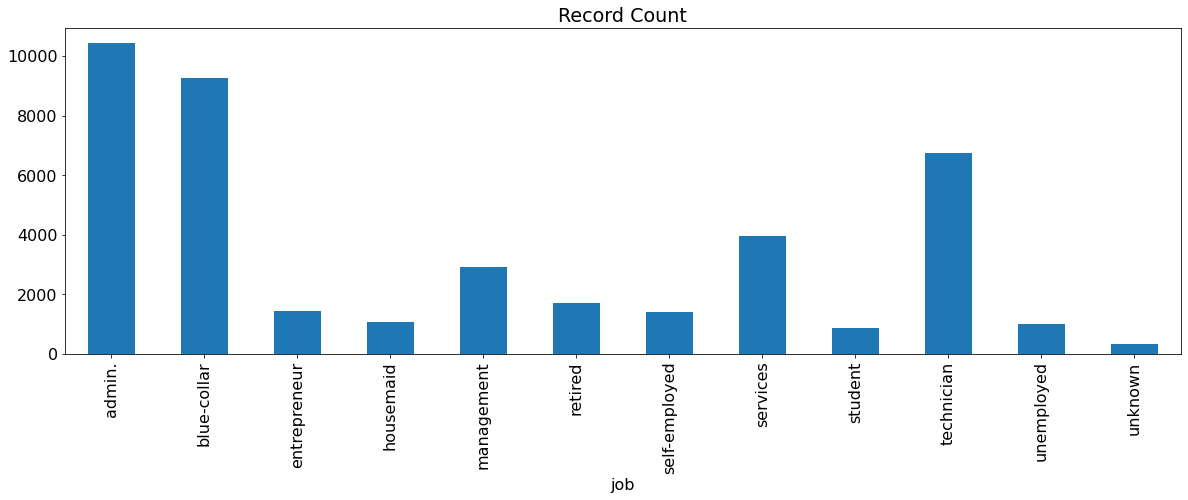

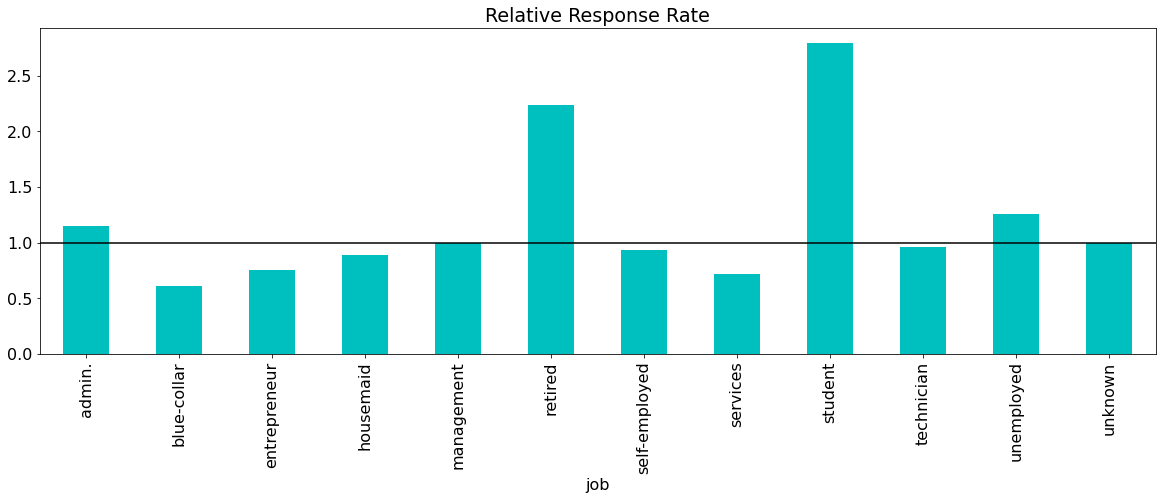

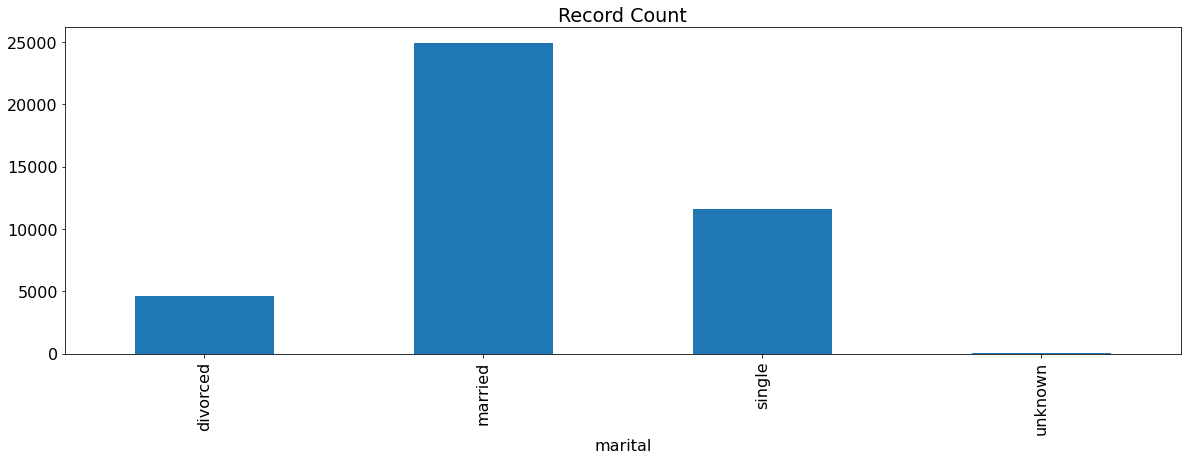

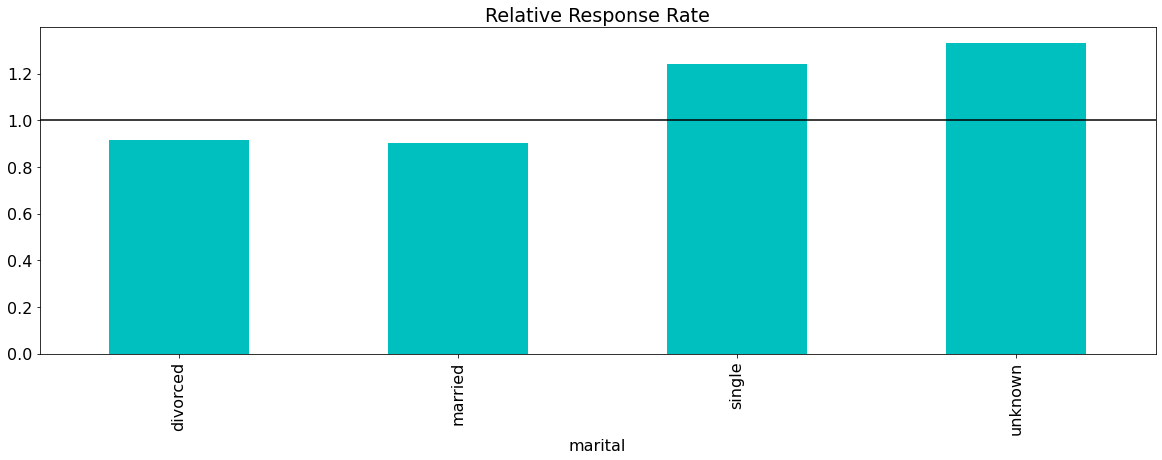

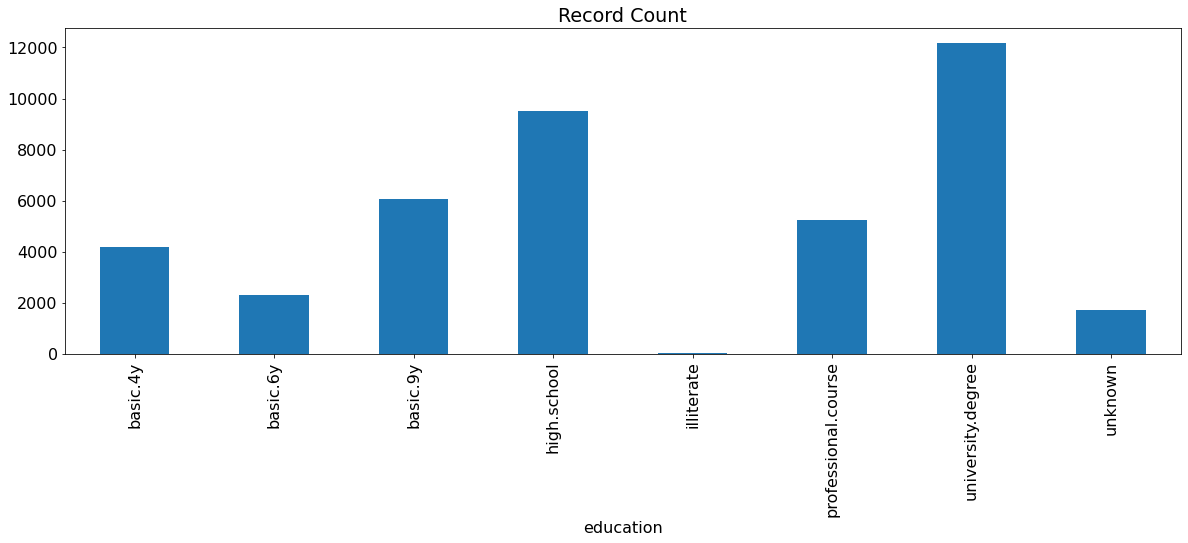

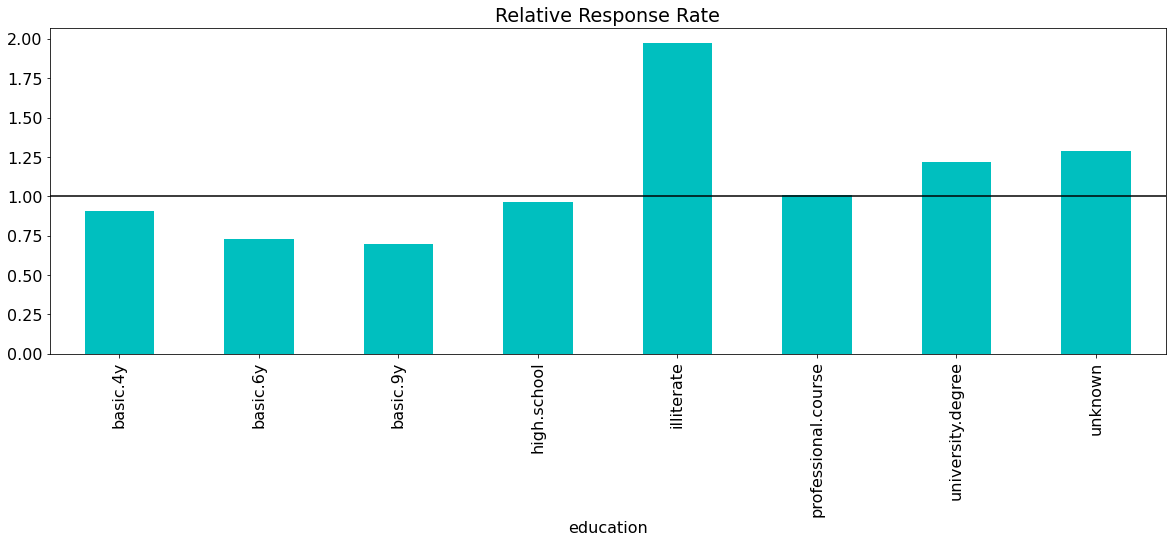

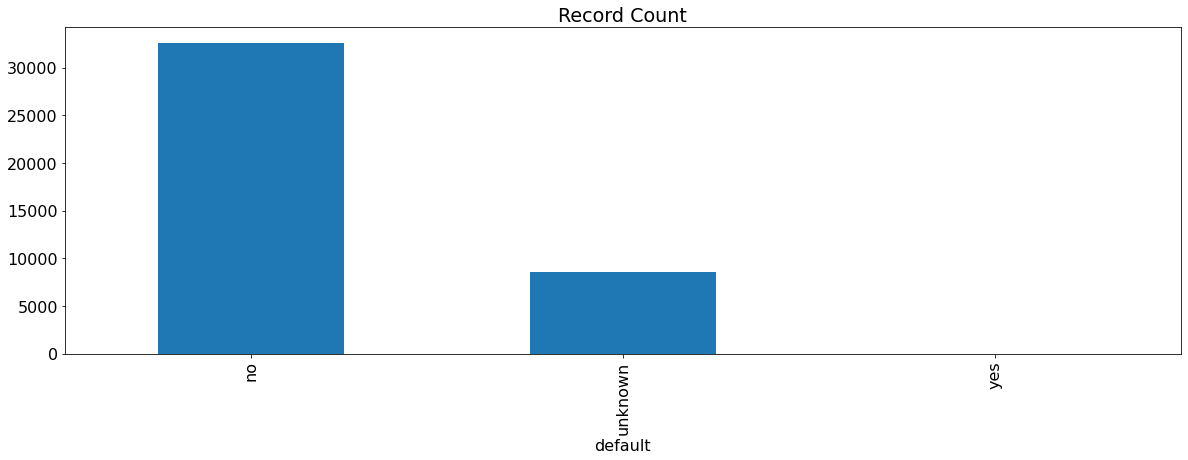

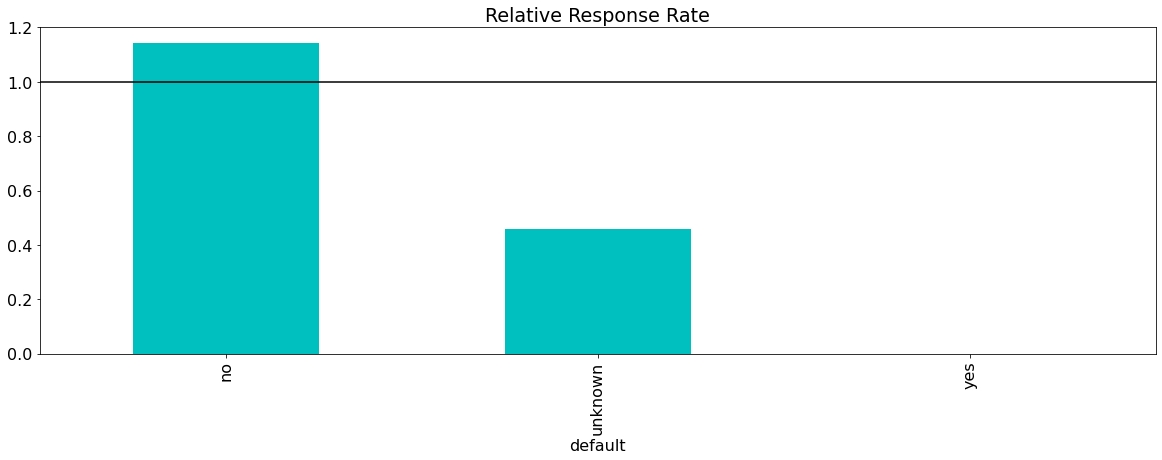

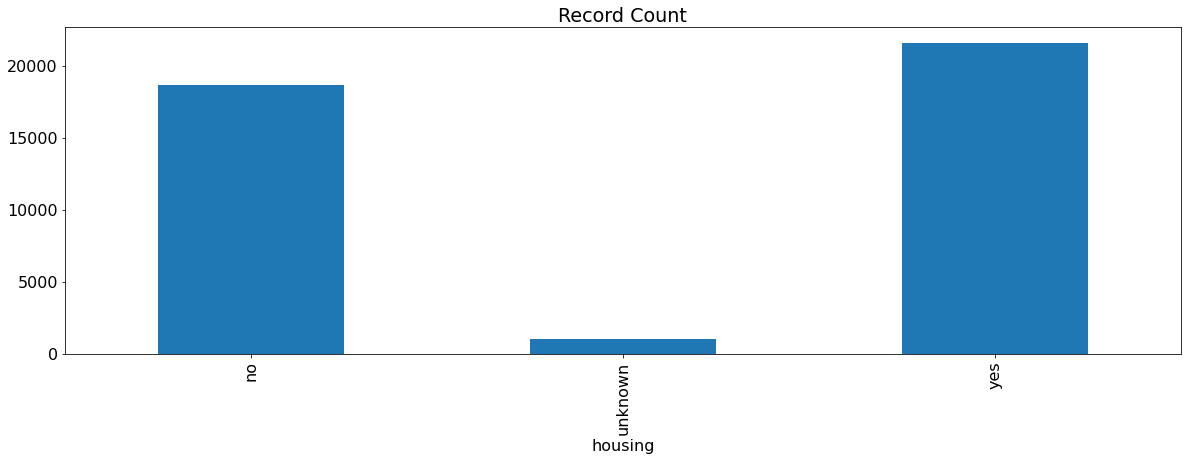

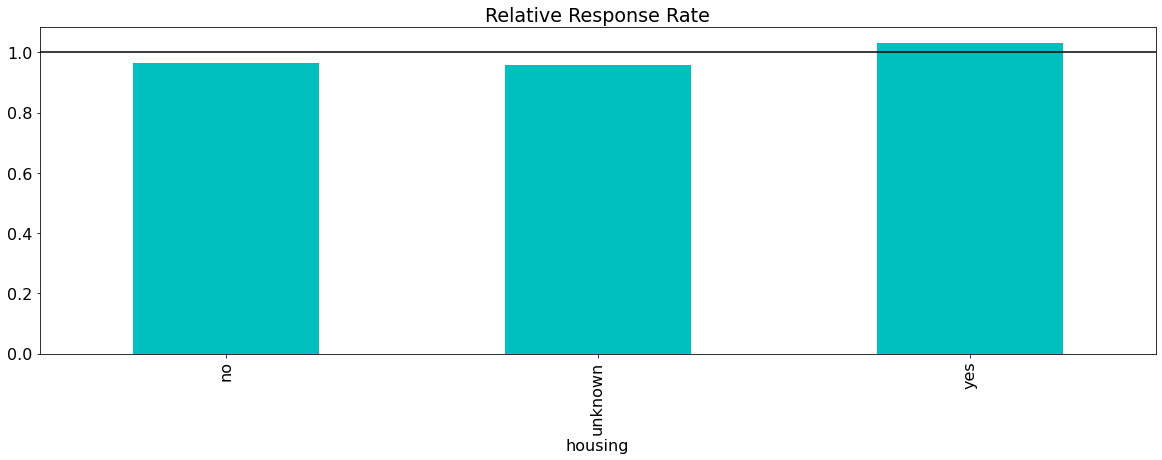

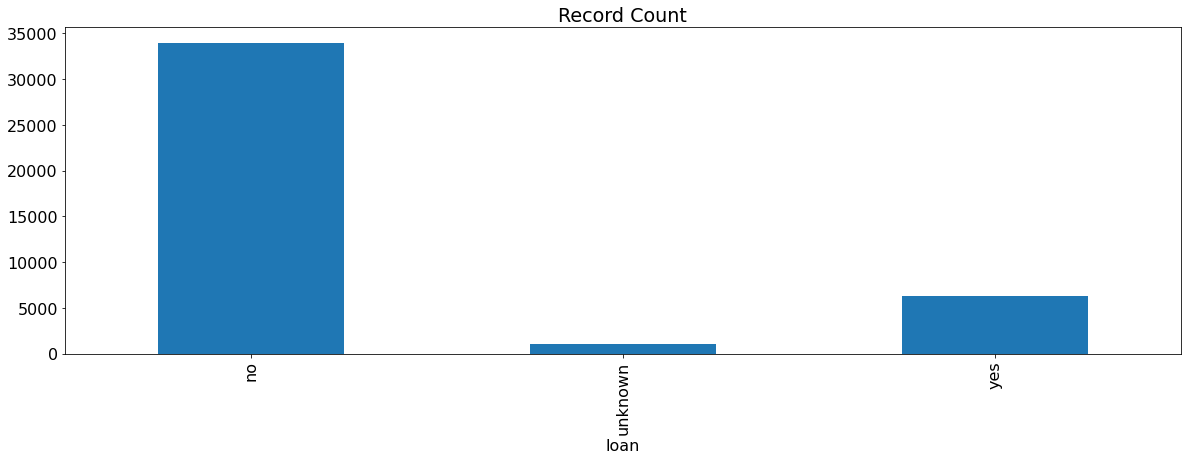

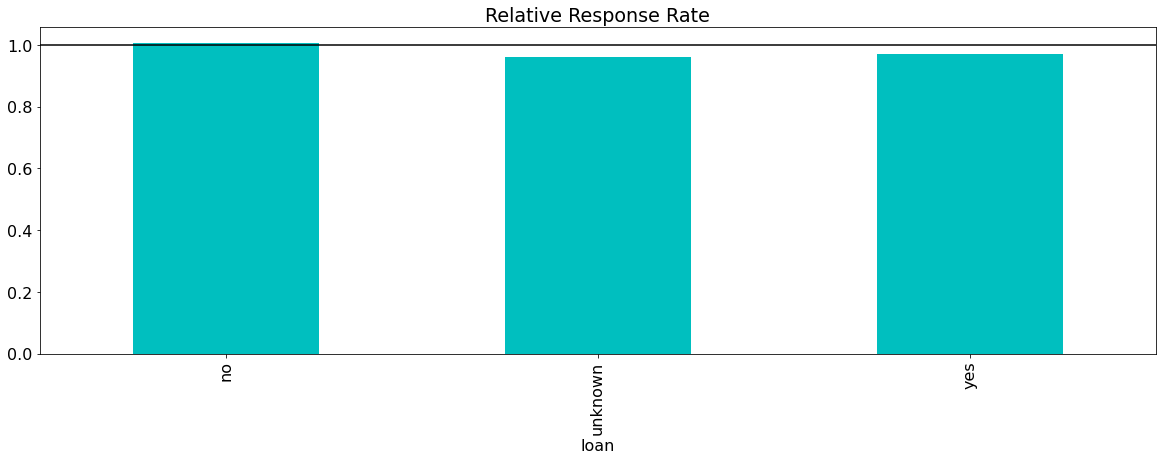

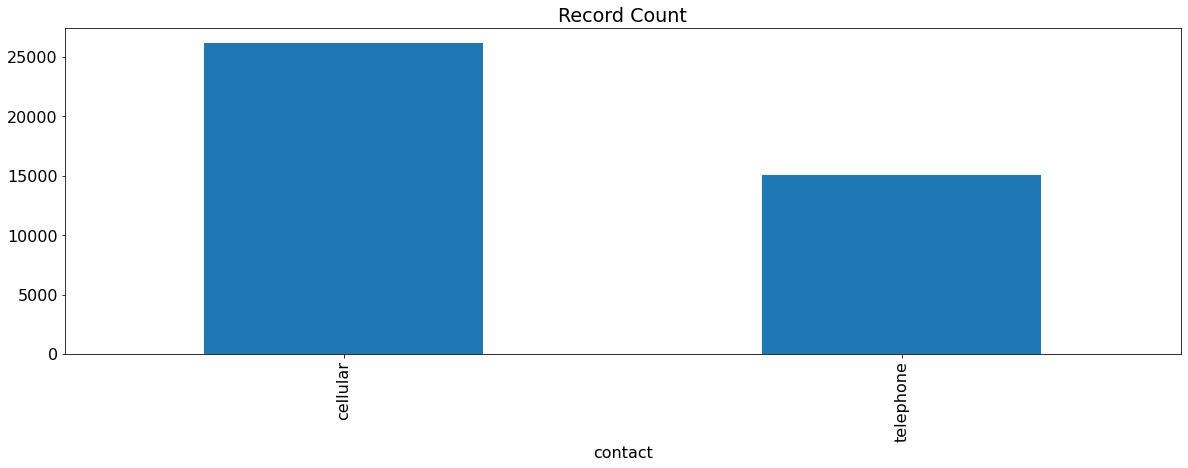

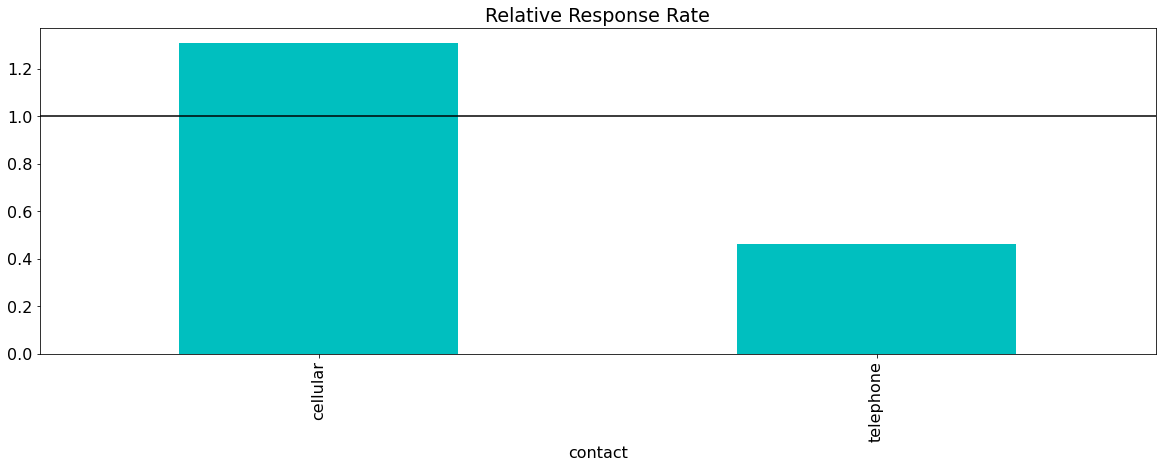

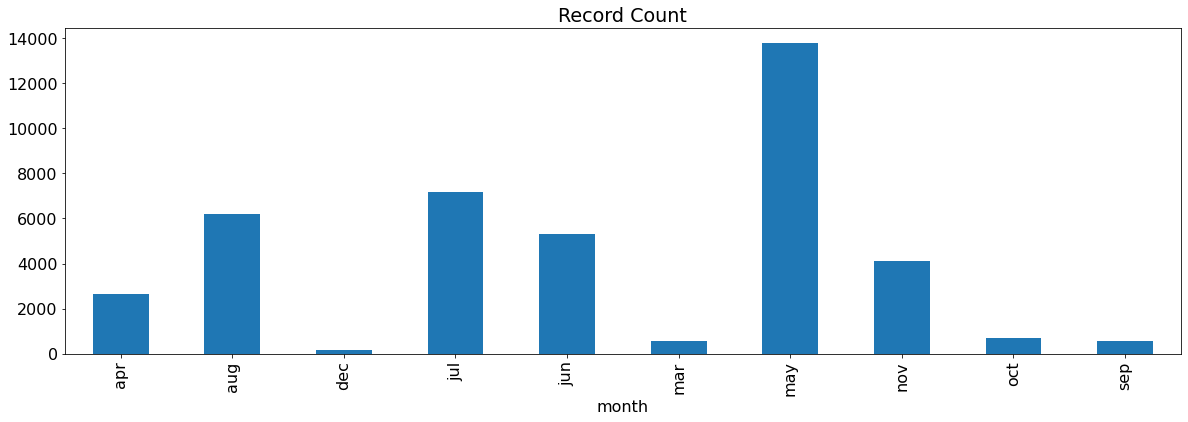

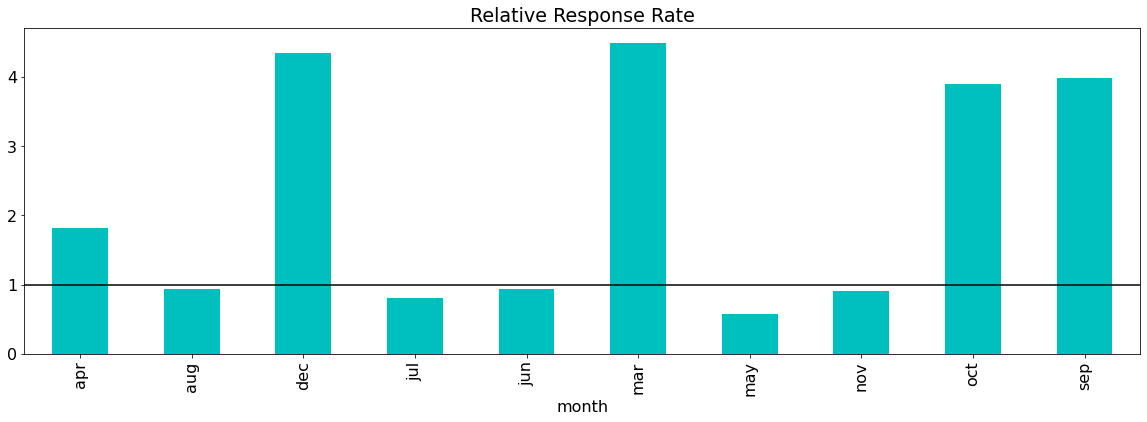

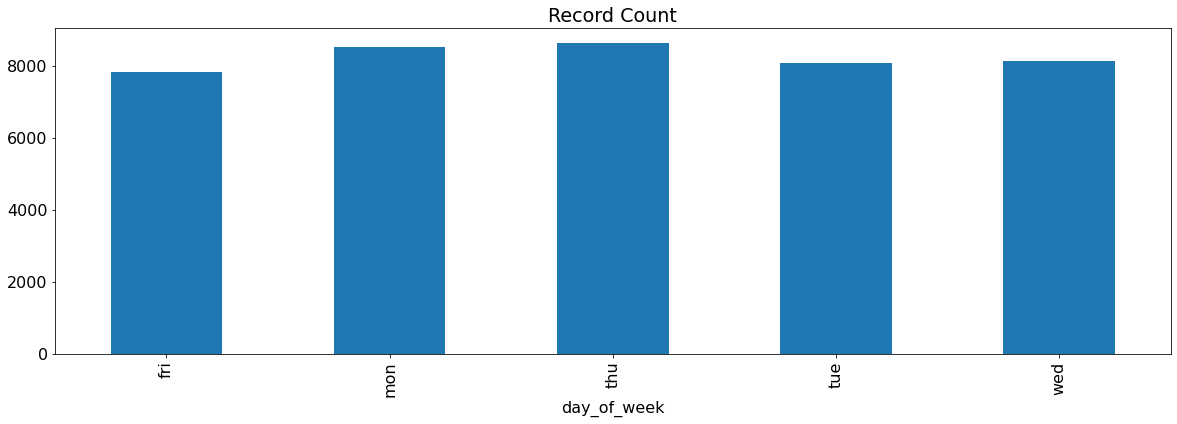

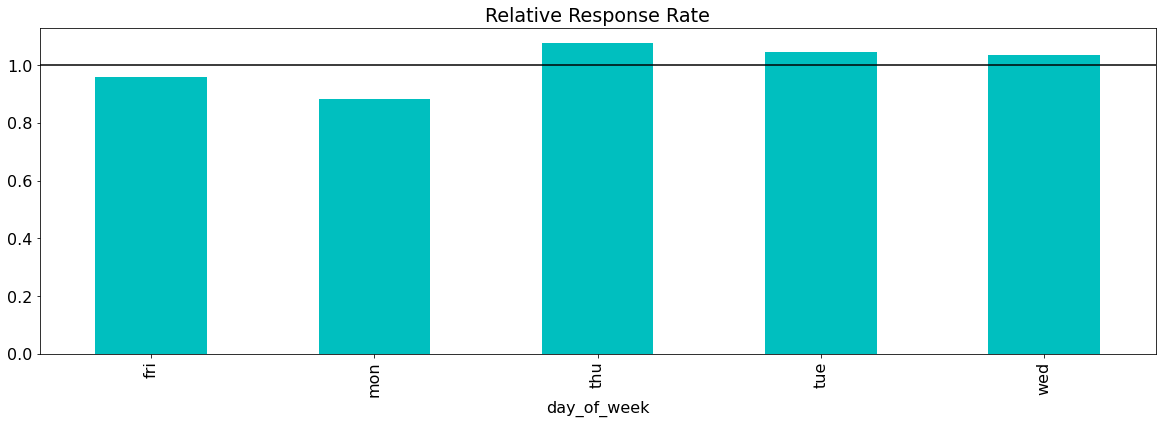

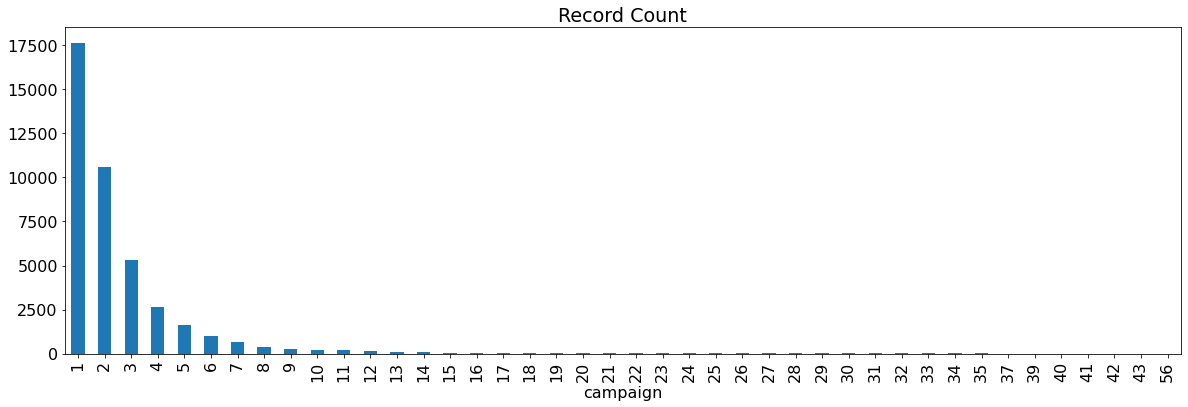

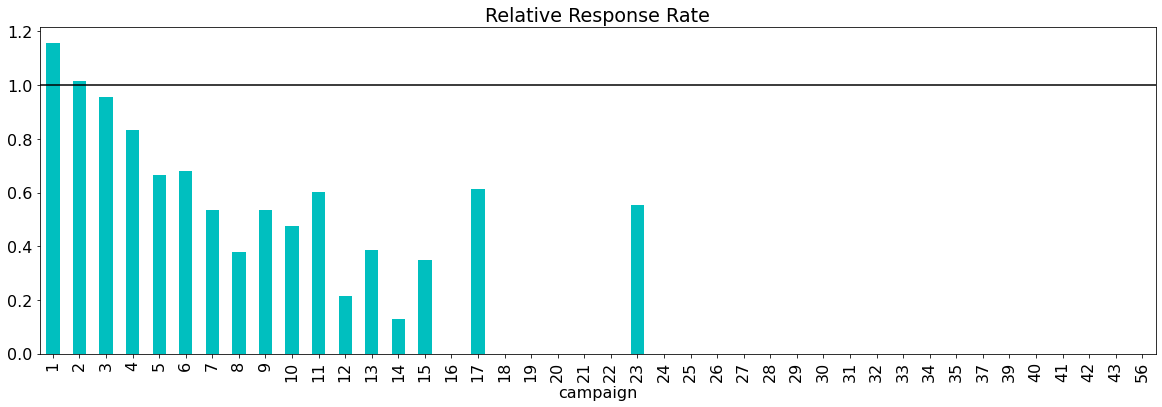

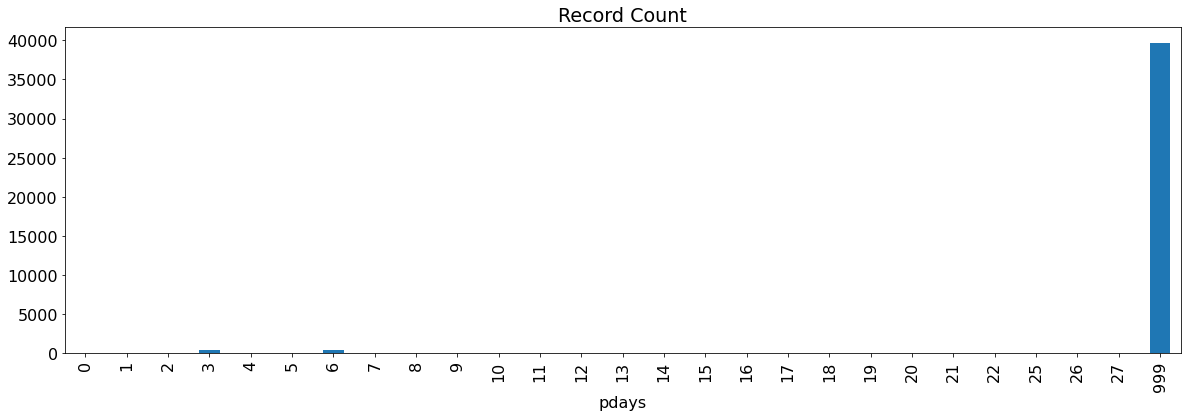

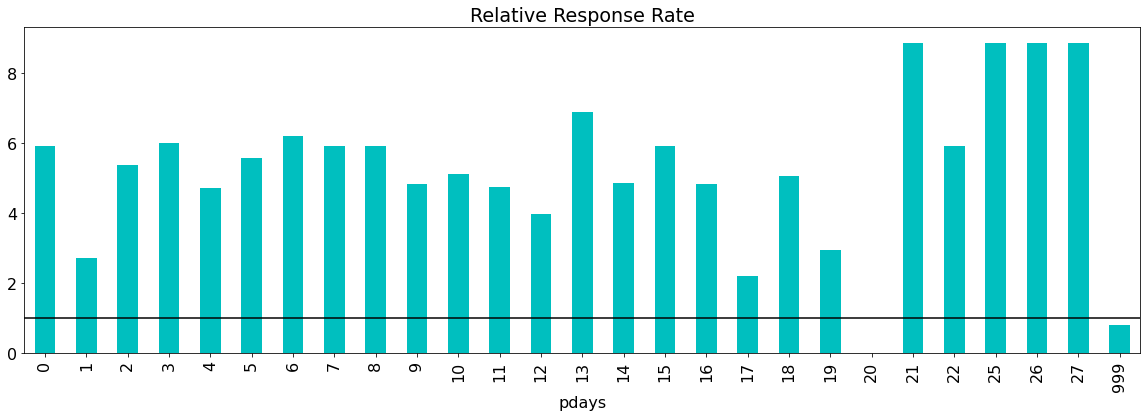

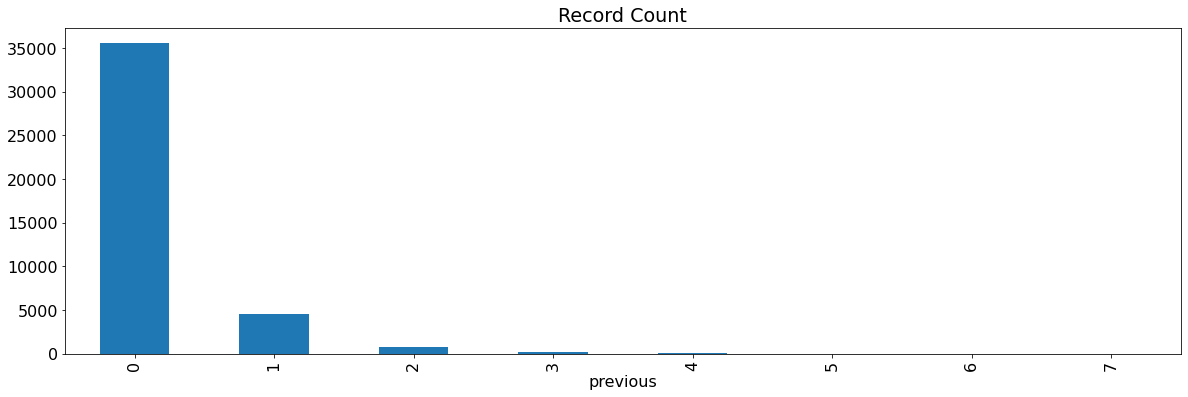

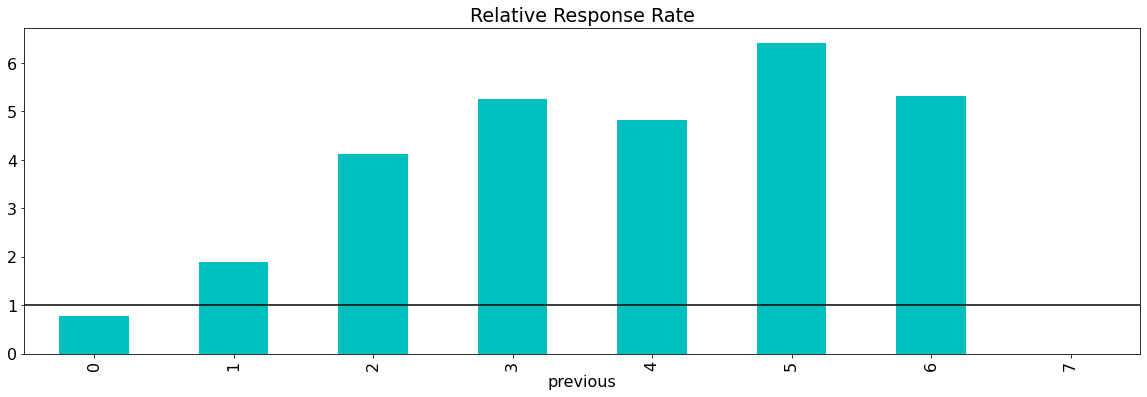

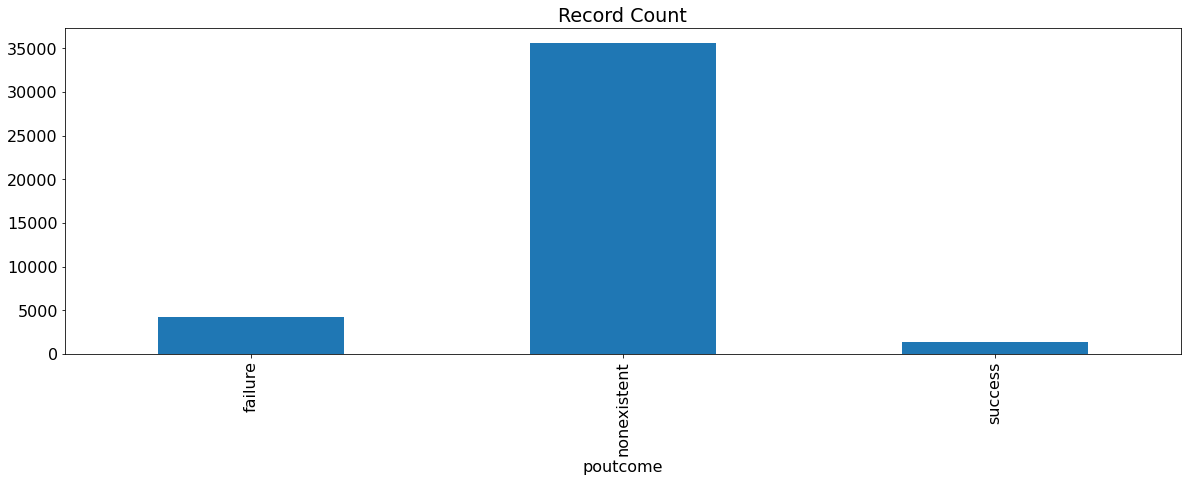

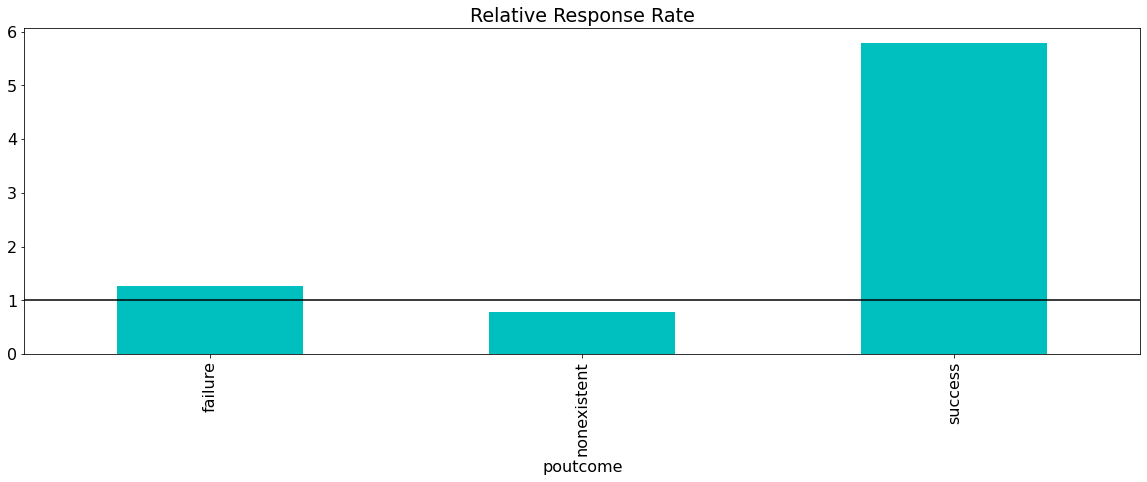

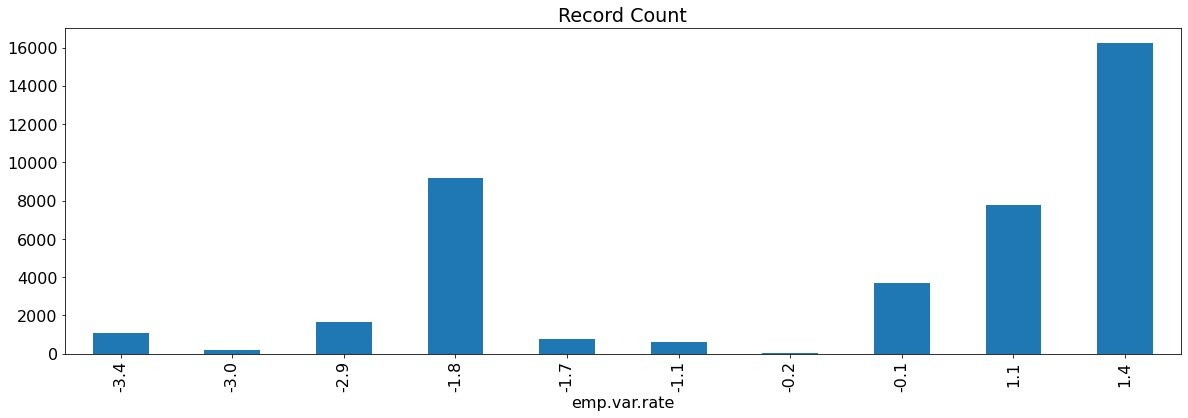

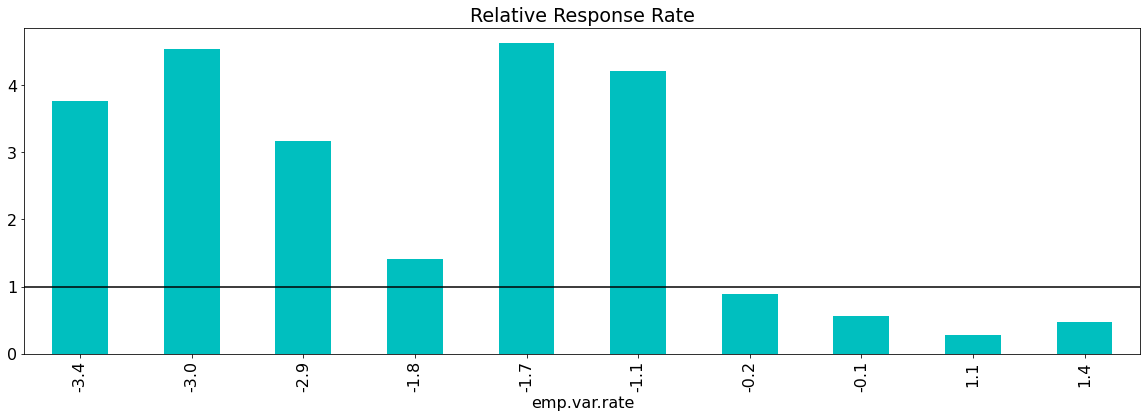

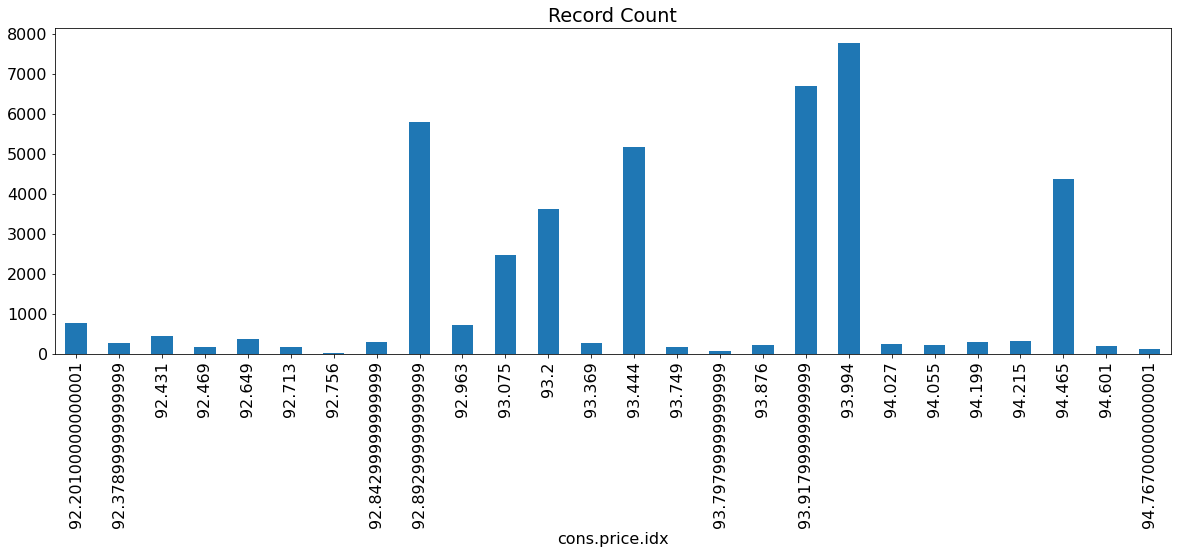

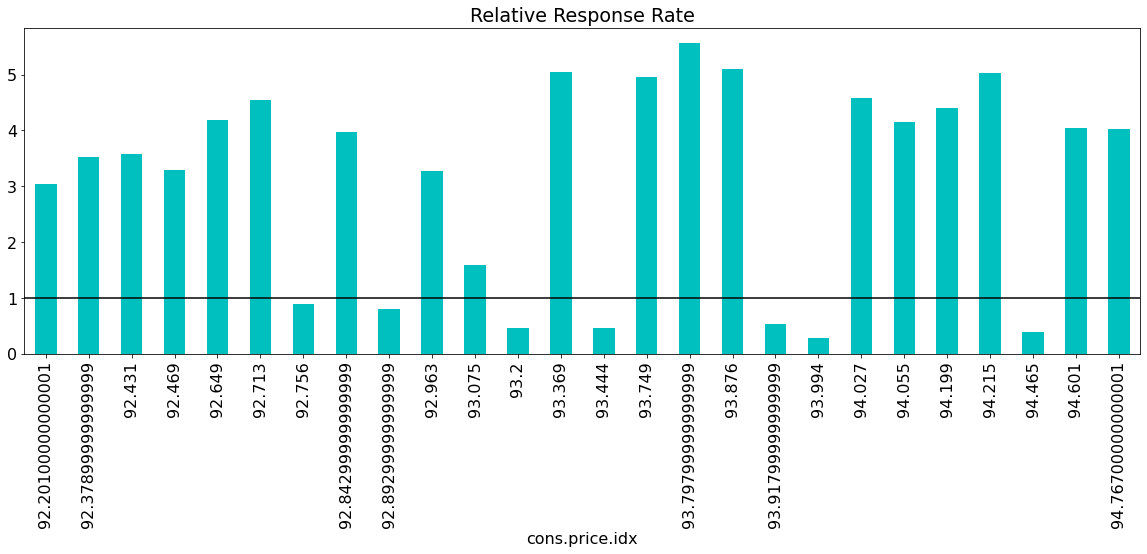

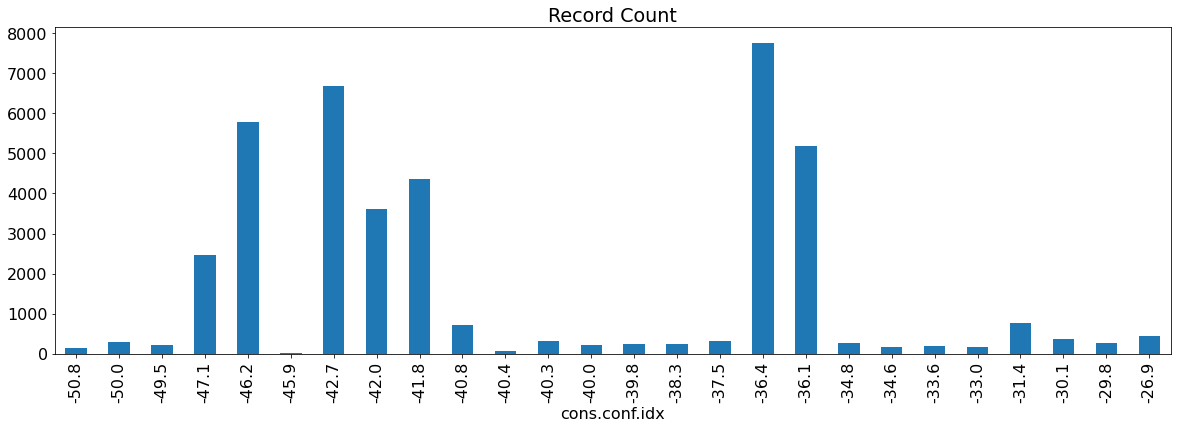

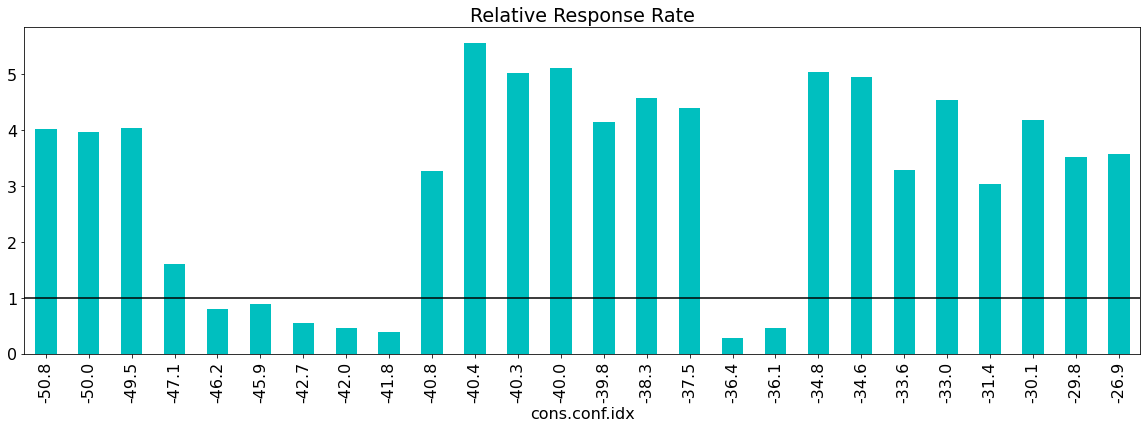

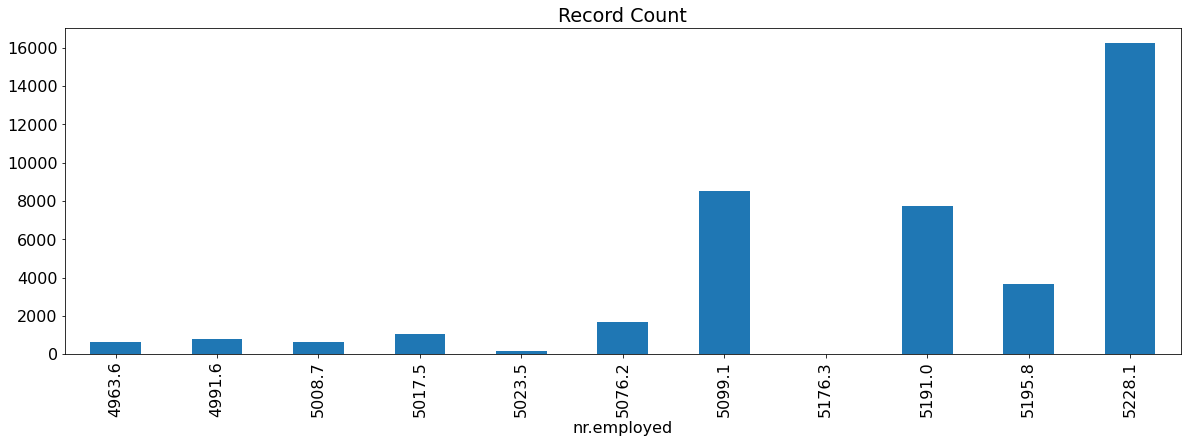

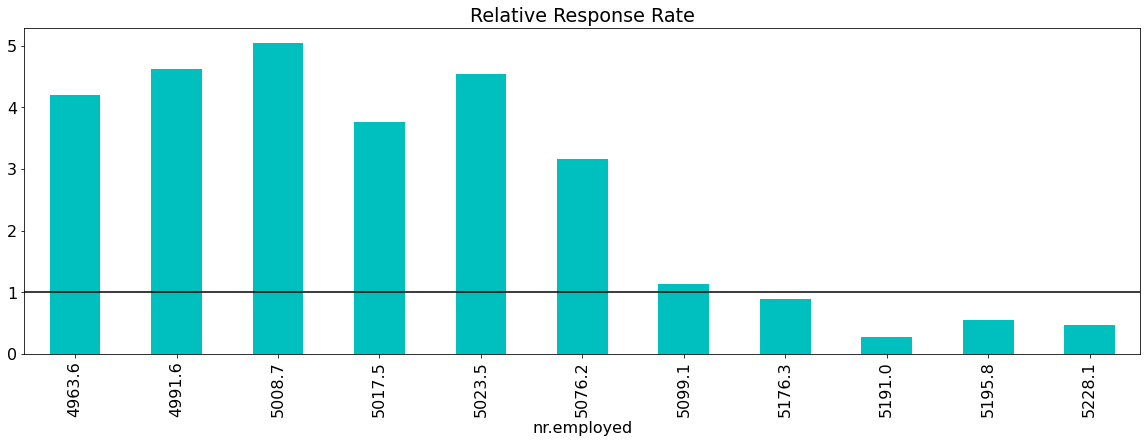

In [18]:
plt.rcParams["figure.figsize"] = [20,6]
plt.rcParams.update({'font.size': 16})

plot_cols=data.columns.tolist()
plot_cols.remove('y')
plot_cols.remove('duration')
plot_cols.remove('euribor3m')

for col in plot_cols:
    plt.title('Record Count')
    plt.xlabel(col)
    data[col].value_counts().sort_index().plot(kind='bar')
    temp = data.groupby(col)['y'].mean() / rate
    plt.show()
    plt.xlabel(col)
    plt.title('Relative Response Rate')
    plt.axhline(1,color='black')
    temp.plot(kind='bar',color='c')
    plt.show()

In [19]:
def create_distribution(data, group):
    dist = pd.DataFrame(data.groupby(group).count()['y']).reset_index().sort_values(by='y', ascending=False)
    dist.rename(columns={'y':'count'}, inplace=True)
    dist['%'] = dist['count']/dist['count'].sum()
    dist['label'] = dist[group] + ': ' \
                            + dist['count'].astype(str) \
                            + '(' + round(dist['%']*100,1).astype(str) + '%)'
    return dist

In [20]:
def donut(plotdata,label,title,startangle=0,fontsize=14):
    
    # Plot a donut chart for visualization
    fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))
    labels = label
    plotdata = plotdata

    wedges, texts = ax.pie(plotdata, wedgeprops=dict(width=0.5), startangle=startangle)

    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"),
              bbox=bbox_props, zorder=0, va="center")

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),fontsize = fontsize,
                    horizontalalignment=horizontalalignment, **kw)

    ax.set_title(title)

    plt.show()

In [21]:
jobs_dist = create_distribution(data,'job')
jobs_dist

,job,count,%,label
0,admin.,10422,0.253035,admin.: 10422(25.3%)
1,blue-collar,9254,0.224677,blue-collar: 9254(22.5%)
9,technician,6743,0.163713,technician: 6743(16.4%)
7,services,3969,0.096363,services: 3969(9.6%)
4,management,2924,0.070992,management: 2924(7.1%)
5,retired,1720,0.041760,retired: 1720(4.2%)
2,entrepreneur,1456,0.035350,entrepreneur: 1456(3.5%)
6,self-employed,1421,0.034500,self-employed: 1421(3.5%)
3,housemaid,1060,0.025736,housemaid: 1060(2.6%)
10,unemployed,1014,0.024619,unemployed: 1014(2.5%)


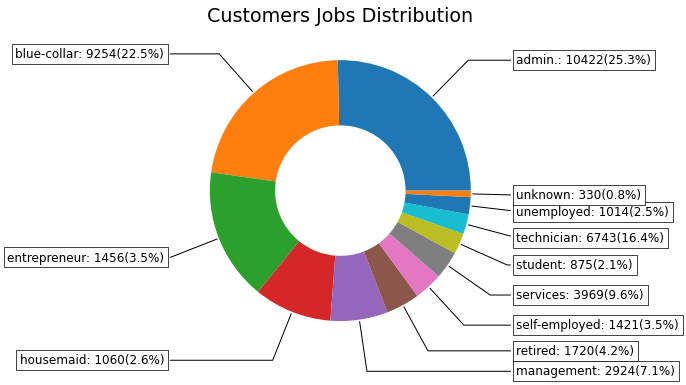

In [22]:
# donut chart
donut(jobs_dist['count'],jobs_dist['label'], 'Customers Jobs Distribution',fontsize=12)

In [23]:
edu_dist = create_distribution(data,'education')
edu_dist

,education,count,%,label
6,university.degree,12168,0.295426,university.degree: 12168(29.5%)
3,high.school,9515,0.231014,high.school: 9515(23.1%)
2,basic.9y,6045,0.146766,basic.9y: 6045(14.7%)
5,professional.course,5243,0.127294,professional.course: 5243(12.7%)
0,basic.4y,4176,0.101389,basic.4y: 4176(10.1%)
1,basic.6y,2292,0.055647,basic.6y: 2292(5.6%)
7,unknown,1731,0.042027,unknown: 1731(4.2%)
4,illiterate,18,0.000437,illiterate: 18(0.0%)


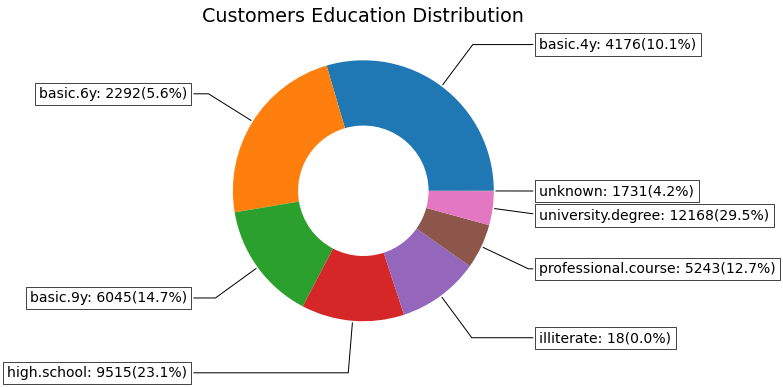

In [24]:
# donut chart
donut(edu_dist['count'],edu_dist['label'],"Customers Education Distribution")

In [25]:
marital_dist = create_distribution(data,'marital')
marital_dist

,marital,count,%,label
1,married,24928,0.605225,married: 24928(60.5%)
2,single,11568,0.280859,single: 11568(28.1%)
0,divorced,4612,0.111974,divorced: 4612(11.2%)
3,unknown,80,0.001942,unknown: 80(0.2%)


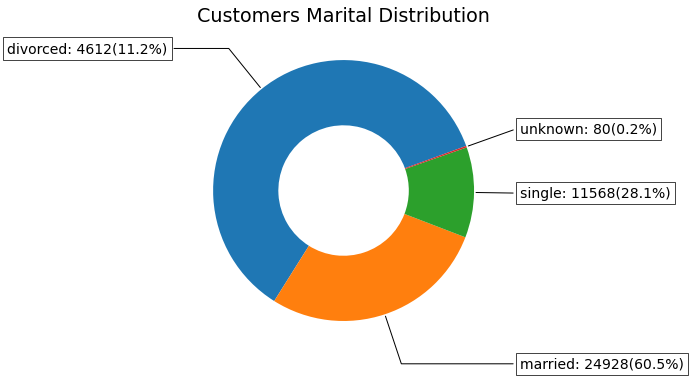

In [26]:
donut(marital_dist['count'],marital_dist['label'],'Customers Marital Distribution',startangle=20)

In [27]:
def draw_numerical(data, col, logscale=False):
    fig = plt.figure(figsize=(15,8))
    grid = plt.GridSpec(4, 1, wspace = 0.5, hspace = 0.2)
    histogram = fig.add_subplot(grid[1:,0])
    boxplot = fig.add_subplot(grid[0,0])

    histogram.hist(data[col],bins=50)
    histogram.set_xlabel(col,fontsize=15)
    if logscale:
        histogram.set_yscale('log')
        histogram.set_ylabel('Logscale of Count')
    else:
        histogram.set_ylabel('Count')
    sns.boxplot(data[col], data['y'], orient='h', ax=boxplot, palette="Reds")
    boxplot.set_xlabel('')
    boxplot.set_title(col,fontsize=15)
    axes=plt.gca()
    axes.set_xticks([], minor=False)
    fig.suptitle(f'{col.capitalize()} Distribution & Boxplot by Success', fontsize=18)
    
    plt.show()

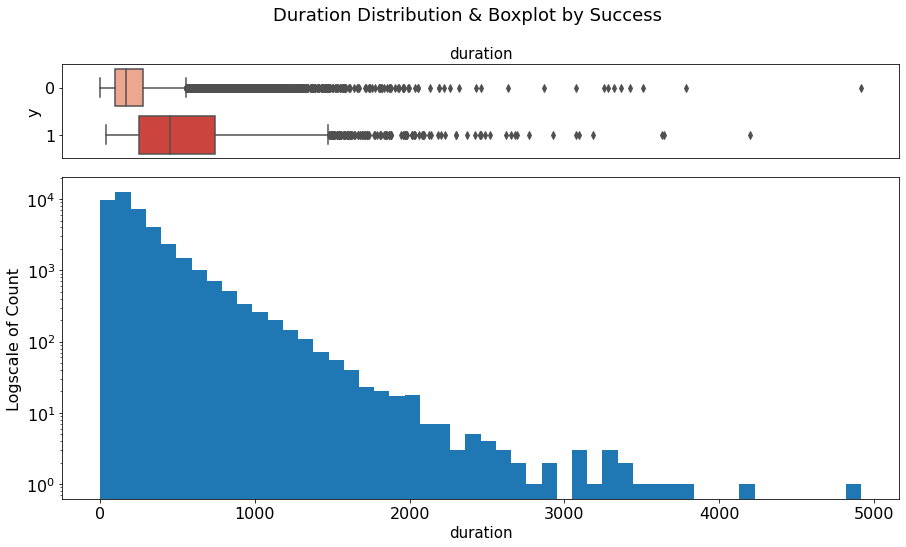

In [28]:
draw_numerical(data, 'duration', logscale=True)

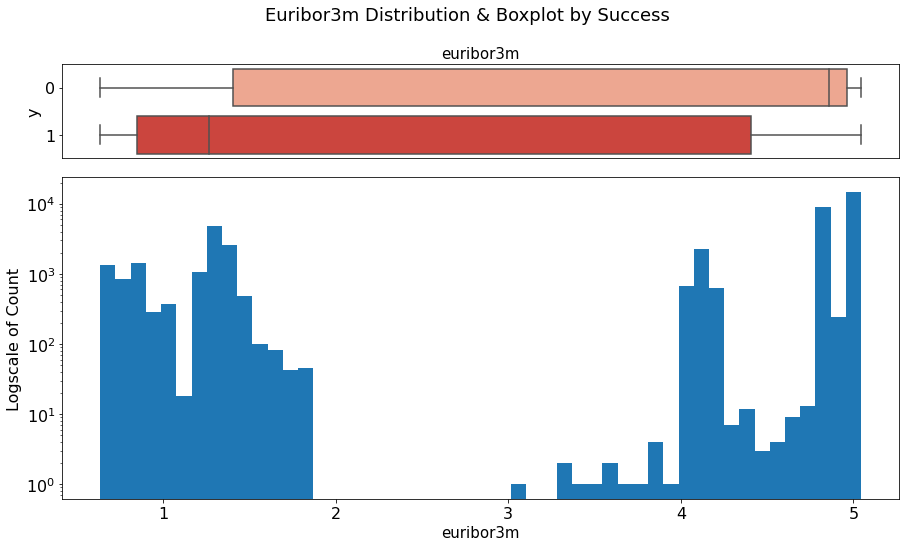

In [29]:
draw_numerical(data, 'euribor3m', logscale=True)

The duration of the call can only be obtained when that bank agent had finished the call, yet by that time the agent should already know if the marketing is success or not. Therefore there's no point in including this variable as a predictor.

By observing the plots, one can find that there is a positive correlation between success rate/lift and pdays. However, value '999' interrupts the positive pattern simplily because the arbitrary number of '999' is chosen to represent no previous campaign record. I changed value "999" to "-99" to hold the positive trend.

Variable "campaign" has a long tail and I capped it at 14, which is around the 99.5th quantile.

Variable "age" shows an interesting pattern against success rate. When customers are under 30, the older the customer is, the less likely he/she will open an account. However, when customers are above 60, the older they are, the more likely they will accept the offer. Therefore I created two variables, one caps age above 30 to 30, and the other caps age below 60 to 60.

In [30]:
data['pdays_mod']=data['pdays'].apply(lambda x: -99 if x==999 else x)
data['campaign_cap']=data['campaign'].clip(upper=20)
data['age_young']=data['age'].clip(upper=30)
data['age_old']=data['age'].clip(lower=60)

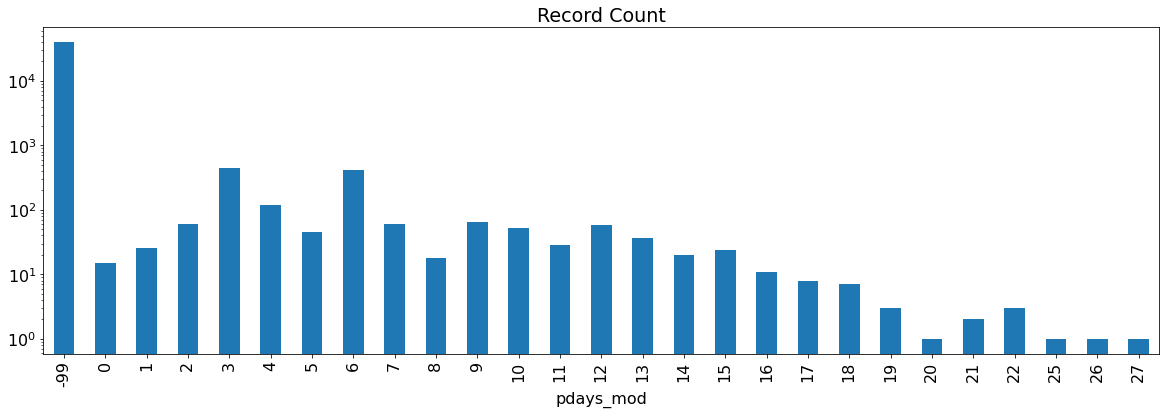

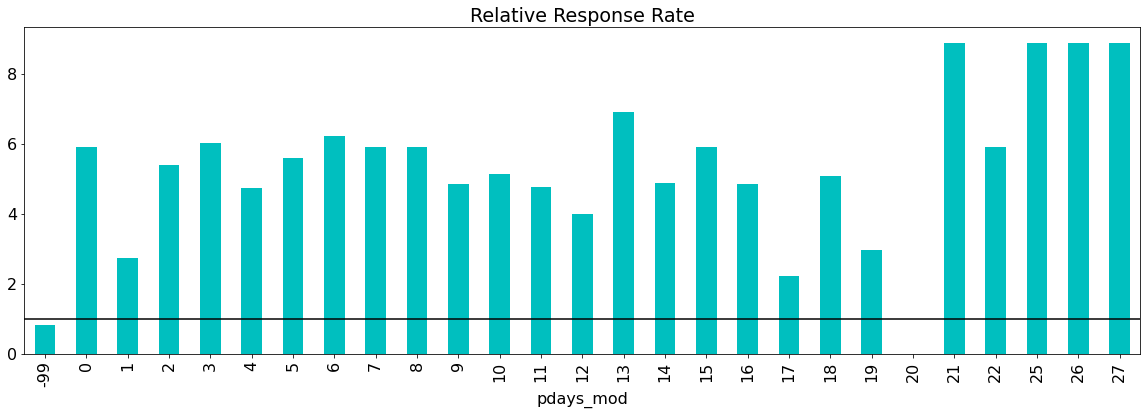

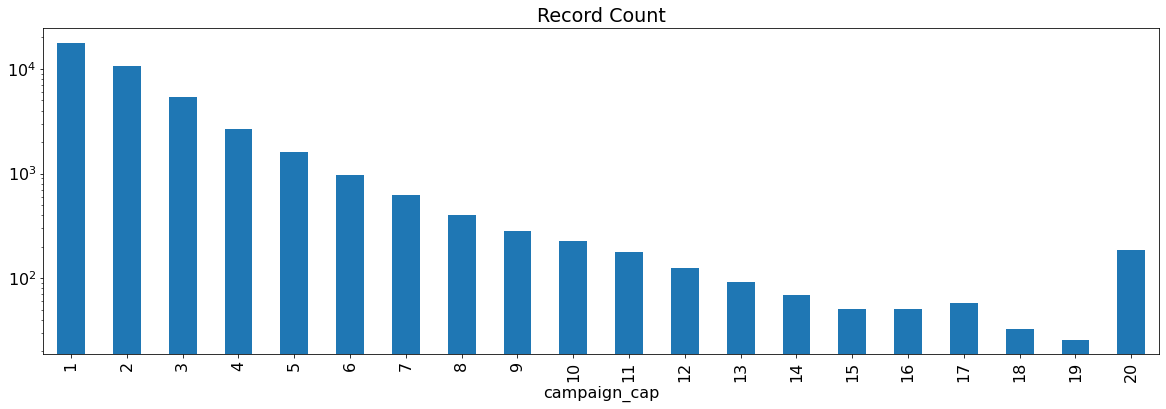

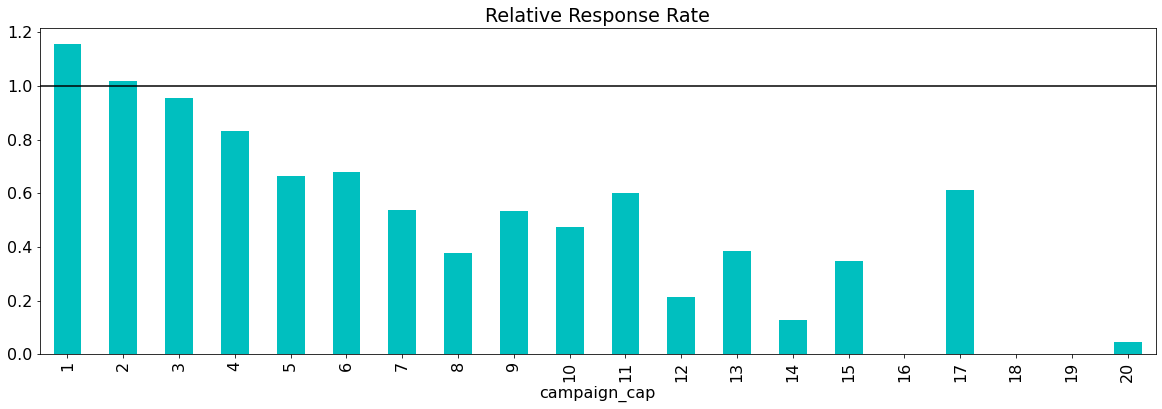

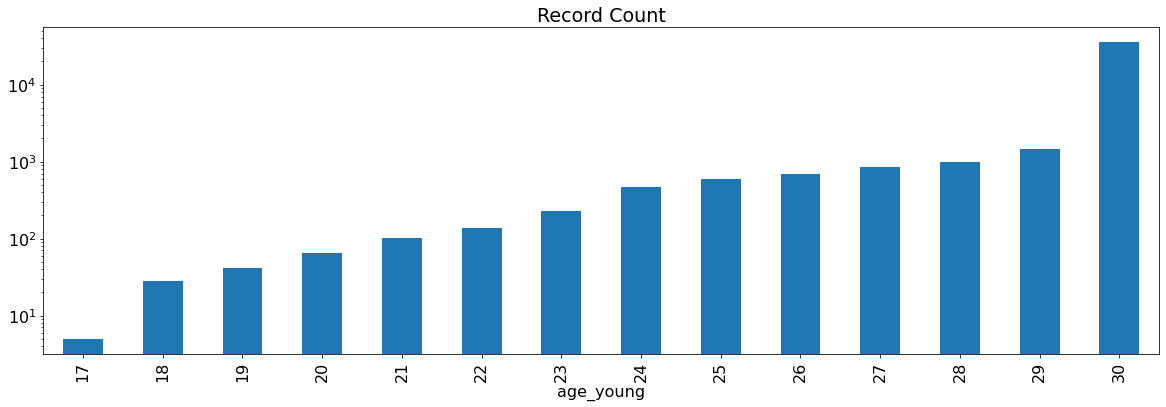

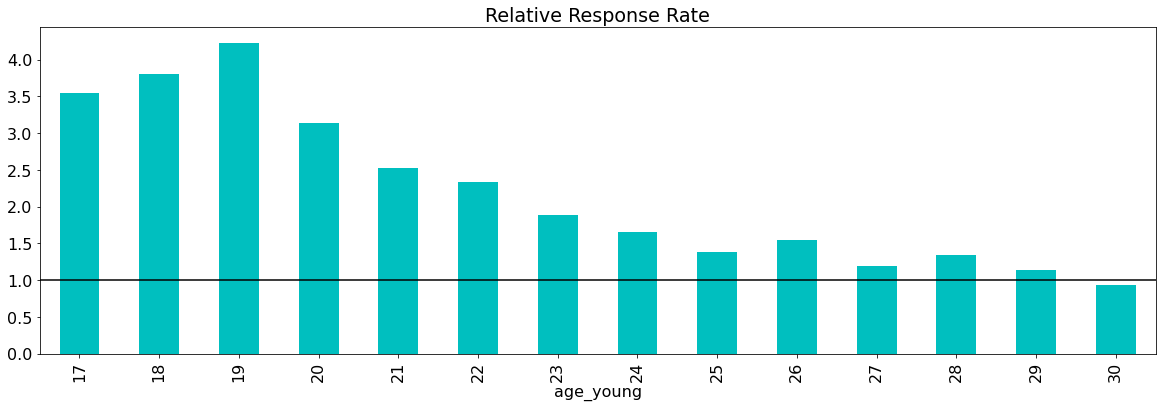

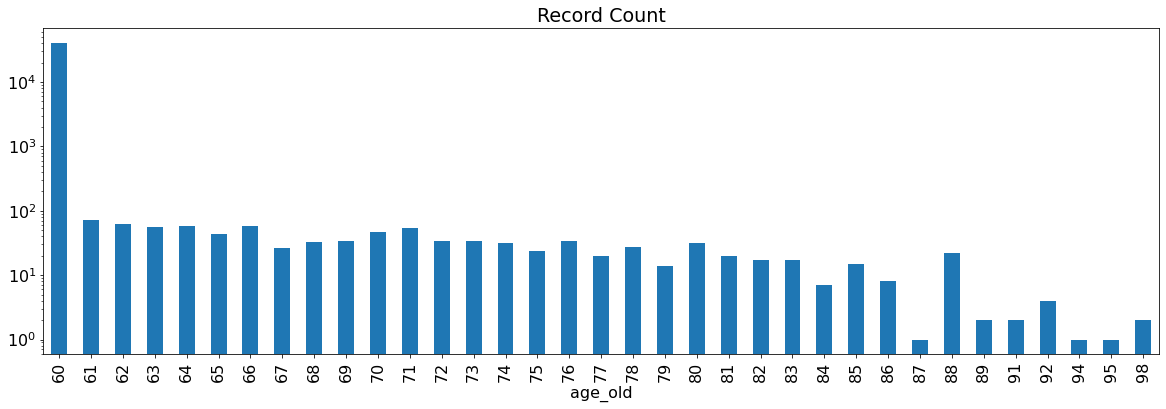

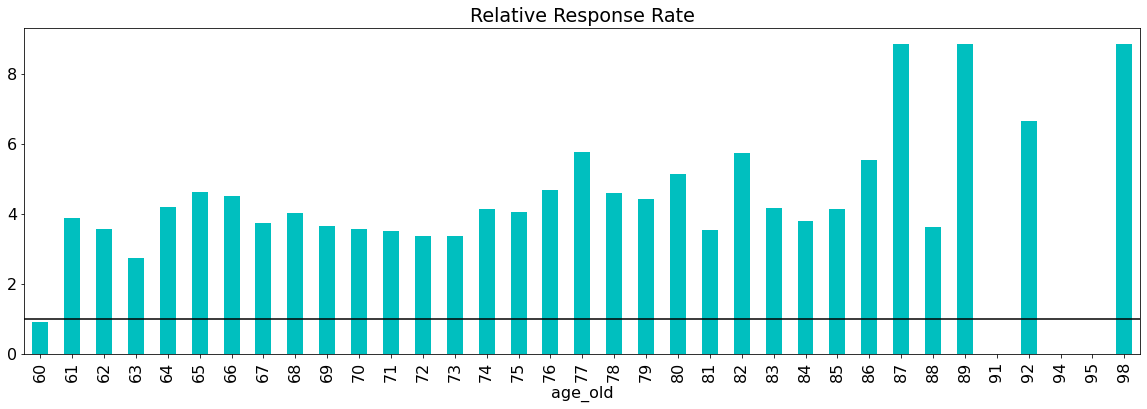

In [31]:
plt.rcParams["figure.figsize"] = [20,6]
plt.rcParams.update({'font.size': 16})

for col in ['pdays_mod','campaign_cap','age_young','age_old']:
    plt.title('Record Count')
    plt.xlabel(col)
    data[col].value_counts().sort_index().plot(kind='bar')
    plt.yscale('log')
    temp = data.groupby(col)['y'].mean() / rate
    plt.show()
    plt.xlabel(col)
    plt.title('Relative Response Rate')
    plt.axhline(1,color='black')
    temp.plot(kind='bar',color='c')
    plt.show()

## Imputation:

Now, to infer the missing values in 'job' and 'education', we make use of the cross-tabulation between 'job' and 'education'. Our hypothesis here is that 'job' is influenced by the 'education' of a person. Hence, we can infer 'job' based on the education of the person. Moreover, since we are just filling the missing values, we are not much concerned about the causal inference. We, therefore, can use the job to predict the education.

In [32]:
def cross_tab(df,f1,f2):
    jobs=list(df[f1].unique())
    edu=list(df[f2].unique())
    dataframes=[]
    for e in edu:
        dfe=df[df[f2]==e]
        dfejob=dfe.groupby(f1).count()[f2]
        dataframes.append(dfejob)
    xx=pd.concat(dataframes,axis=1)
    xx.columns=edu
    xx=xx.fillna(0)
    return xx

In [33]:
list(data['education'].unique())

['basic.4y',
 'high.school',
 'basic.6y',
 'basic.9y',
 'professional.course',
 'unknown',
 'university.degree',
 'illiterate']

In [34]:
cross_tab(data,'job','education')

,basic.4y,high.school,basic.6y,basic.9y,professional.course,unknown,university.degree,illiterate
admin.,77,3329,151,499,363,249,5753,1.0
blue-collar,2318,878,1426,3623,453,454,94,8.0
entrepreneur,137,234,71,210,135,57,610,2.0
housemaid,474,174,77,94,59,42,139,1.0
management,100,298,85,166,89,123,2063,0.0
retired,597,276,75,145,241,98,285,3.0
self-employed,93,118,25,220,168,29,765,3.0
services,132,2682,226,388,218,150,173,0.0
student,26,357,13,99,43,167,170,0.0
technician,58,873,87,384,3320,212,1809,0.0


In [35]:
data['job'][data['age']>60].value_counts()

retired          678
housemaid         54
admin.            47
technician        34
management        30
unknown           21
blue-collar       20
self-employed      9
entrepreneur       8
unemployed         7
services           2
Name: job, dtype: int64

In [36]:
data['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [37]:
data[['job','age']]

,job,age
0,housemaid,56
1,services,57
2,services,37
3,admin.,40
4,services,56
...,...,...
41183,retired,73
41184,blue-collar,46
41185,retired,56
41186,technician,44


In [38]:
data['job'][data['age']<26].value_counts()

student          454
blue-collar      327
admin.           315
services         246
technician       171
self-employed     40
management        38
unemployed        35
entrepreneur      20
housemaid         11
unknown            8
retired            1
Name: job, dtype: int64

In [39]:
data['job'][data['job']=='admin.'].value_counts()

admin.    10422
Name: job, dtype: int64

In [40]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_mod,campaign_cap,age_young,age_old
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,0,-99,1,30,60
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,0,-99,1,30,60
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,0,-99,1,30,60
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,0,-99,1,30,60
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,0,-99,1,30,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,-1.1,94.767,-50.8,1.028,4963.6,1,-99,1,30,73
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,-1.1,94.767,-50.8,1.028,4963.6,0,-99,1,30,60
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,-1.1,94.767,-50.8,1.028,4963.6,0,-99,2,30,60
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,-1.1,94.767,-50.8,1.028,4963.6,1,-99,1,30,60


** Inferring education from jobs **: From the cross-tabulation, it can be seen that people with management jobs usually have a university degree. Hence wherever 'job' = management and 'education' = unknown, we can replace 'education' with 'university.degree'. Similarly, 'job' = 'services' --> 'education' = 'high.school' and 'job' = 'housemaid' --> 'education' = 'basic.4y'.

** Inferring jobs from education **: If 'education' = 'basic.4y' or 'basic.6y' or 'basic.9y' then the 'job' is usually 'blue-collar'. If 'education' = 'professional.course', then the 'job' = 'technician'.

** Inferring jobs from age**: As we see, if 'age' > 60, then the 'job' is 'retired,' which makes sense.

While imputing the values for job and education, we were cognizant of the fact that the correlations should make real world sense. If it didn't make real world sense, we didn't replace the missing values.

In [41]:
data.loc[(data['age']>60) & (data['job']=='unknown'), 'job'] = 'retired'
data.loc[(data['age']<26) & (data['job']=='unknown'), 'job'] = 'student'
data.loc[(data['education']=='unknown') & (data['job']=='management'), 'education'] = 'university.degree'
data.loc[(data['education']=='unknown') & (data['job']=='services'), 'education'] = 'high.school'
data.loc[(data['education']=='unknown') & (data['job']=='housemaid'), 'education'] = 'basic.4y'
data.loc[(data['education']=='unknown') & (data['job']=='admin.'), 'education'] = 'university.degree'
data.loc[(data['education']=='unknown') & (data['job']=='technician'), 'education'] = 'professional.course'
data.loc[(data['education']=='unknown') & (data['job']=='student'), 'education'] = 'high.school'
data.loc[(data['education']=='unknown') & (data['job']=='blue-collar'), 'education'] = 'basic.9y'
data.loc[(data['education']=='unknown') & (data['job']=='entrepreneur'), 'education'] = 'university.degree'
data.loc[(data['education']=='unknown') & (data['job']=='retired'), 'education'] = 'basic.4y'
data.loc[(data['education']=='unknown') & (data['job']=='self-employed'), 'education'] = 'university.degree'
data.loc[(data['job'] == 'unknown') & (data['education']=='basic.4y'), 'job'] = 'blue-collar'
data.loc[(data['job'] == 'unknown') & (data['education']=='basic.6y'), 'job'] = 'blue-collar'
data.loc[(data['job'] == 'unknown') & (data['education']=='basic.9y'), 'job'] = 'blue-collar'
data.loc[(data['job'] =='unknown') & (data['education']=='professional.course'), 'job'] = 'technician'
data.loc[(data['job'] =='unknown') & (data['education']=='university.degree'), 'job'] = 'admin.'

In [42]:
cross_tab(data,'job','education')

,basic.4y,high.school,basic.6y,basic.9y,professional.course,university.degree,unknown,illiterate
admin.,77.0,3329,151.0,499.0,363.0,6038.0,0.0,1.0
blue-collar,2366.0,878,1448.0,4108.0,453.0,94.0,0.0,8.0
entrepreneur,137.0,234,71.0,210.0,135.0,667.0,0.0,2.0
housemaid,516.0,174,77.0,94.0,59.0,139.0,0.0,1.0
management,100.0,298,85.0,166.0,89.0,2186.0,0.0,0.0
retired,713.0,276,75.0,145.0,243.0,286.0,0.0,3.0
self-employed,93.0,118,25.0,220.0,168.0,794.0,0.0,3.0
services,132.0,2832,226.0,388.0,218.0,173.0,0.0,0.0
student,26.0,524,13.0,99.0,43.0,178.0,0.0,0.0
technician,58.0,873,87.0,384.0,3542.0,1809.0,0.0,0.0


As we can see, we are able to reduce the number of unknowns and enhance our data set.

In [43]:
jobhousing=cross_tab(data,'job','housing')
jobloan=cross_tab(data,'job','loan')

In [44]:
jobhousing

,no,yes,unknown
job,,,
admin.,4651,5578,229
blue-collar,4362,4752,241
entrepreneur,641,779,36
housemaid,491,540,29
management,1363,1490,71
retired,789,908,44
self-employed,641,740,40
services,1818,2050,101
student,384,476,23


In [45]:
jobloan

,no,yes,unknown
job,,,
admin.,8512,1717,229
blue-collar,7730,1384,241
entrepreneur,1214,206,36
housemaid,877,154,29
management,2414,439,71
retired,1452,245,44
self-employed,1186,195,40
services,3267,601,101
student,716,144,23


** Imputations for house and loan **: We are again using cross-tabulation between 'house' and 'job' and between 'loan' and 'job.' Our hypothesis is that housing loan status (Yes or No) should be in the proportion of each job category. Hence using the prior known distribution of the housing loan for each job category, the house loan for unknown people will be predicted such that the prior distribution (% House = Yes's and No's for each job category remains the same). Similarly, we have filled the missing values in the 'loan' variable.

In [46]:
def fillhousing(df,jobhousing):
    """Function for imputation via cross-tabulation to fill missing values for the 'housing' categorical feature"""
    jobs=['housemaid','services','admin.','blue-collar','technician','retired','management','unemployed','self-employed','entrepreneur','student']
    house=["no","yes"]
    for j in jobs:
        ind=df[np.logical_and(np.array(df['housing']=='unknown'),np.array(df['job']==j))].index
        mask=np.random.rand(len(ind))<((jobhousing.loc[j]['no'])/(jobhousing.loc[j]['no']+jobhousing.loc[j]['yes']))
        ind1=ind[mask]
        ind2=ind[~mask]
        df.loc[ind1,"housing"]='no'
        df.loc[ind2,"housing"]='yes'
    return df

In [47]:
def fillloan(df,jobloan):
    """Function for imputation via cross-tabulation to fill missing values for the 'loan' categorical feature"""
    jobs=['housemaid','services','admin.','blue-collar','technician','retired','management','unemployed','self-employed','entrepreneur','student']
    loan=["no","yes"]
    for j in jobs:
        ind=df[np.logical_and(np.array(df['loan']=='unknown'),np.array(df['job']==j))].index
        mask=np.random.rand(len(ind))<((jobloan.loc[j]['no'])/(jobloan.loc[j]['no']+jobloan.loc[j]['yes']))
        ind1=ind[mask]
        ind2=ind[~mask]
        df.loc[ind1,"loan"]='no'
        df.loc[ind2,"loan"]='yes'
    return df

In [48]:
data=fillhousing(data,jobhousing)

In [49]:
data=fillloan(data,jobloan)

In [50]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'pdays_mod',
       'campaign_cap', 'age_young', 'age_old'],
      dtype='object')

In [51]:
display(cross_tab(data,'job','housing'))
display(cross_tab(data,'job','loan'))

,no,yes,unknown
admin.,4748,5710,0.0
blue-collar,4491,4864,0.0
entrepreneur,656,800,0.0
housemaid,508,552,0.0
management,1394,1530,0.0
retired,804,937,0.0
self-employed,659,762,0.0
services,1856,2113,0.0
student,393,490,0.0
technician,3051,3702,0.0


,no,yes,unknown
admin.,8699,1759,0.0
blue-collar,7932,1423,0.0
entrepreneur,1246,210,0.0
housemaid,900,160,0.0
management,2474,450,0.0
retired,1491,250,0.0
self-employed,1219,202,0.0
services,3356,613,0.0
student,735,148,0.0
technician,5741,1012,0.0


In [52]:
for catvar in categorical_fields:
    nlim = 50
    if data[catvar].value_counts().min() < nlim:
        idx = data[catvar].value_counts().idxmin()
        val = data[catvar].value_counts().min()
        print(data[catvar].value_counts())
        print("\033[1m"f'For the {catvar} field, the \'{idx}\' entry has {val} observations.'"\033[0m")
        print('')

university.degree      12626
high.school             9832
basic.9y                6499
professional.course     5455
basic.4y                4330
basic.6y                2292
unknown                  136
illiterate                18
Name: education, dtype: int64
For the education field, the 'illiterate' entry has 18 observations.

no         32588
unknown     8597
yes            3
Name: default, dtype: int64
For the default field, the 'yes' entry has 3 observations.

yes        22119
no         19067
unknown        2
Name: housing, dtype: int64
For the housing field, the 'unknown' entry has 2 observations.

no         34782
yes         6404
unknown        2
Name: loan, dtype: int64
For the loan field, the 'unknown' entry has 2 observations.



In [53]:
# Imputing 'illiterate' for jobs
# Reason that for purposes of modeling, illiterate may be grouped with unknown
data['education'][data['education']=='unknown'] = 'illiterate'
data['education'].value_counts()

university.degree      12626
high.school             9832
basic.9y                6499
professional.course     5455
basic.4y                4330
basic.6y                2292
illiterate               154
Name: education, dtype: int64

In [54]:
# Imputing the 'default' field
# Given only 3 options, without outside information, may be reasonable to group 'unknown' and 'yes'
data['default'][data['default']=='unknown'] = 'yes'
data['default'].value_counts()

no     32588
yes     8600
Name: default, dtype: int64

In [55]:
# Imputing the 'housing' field
data['housing'][data['housing']=='unknown'] = 'yes'
data['housing'].value_counts()

yes    22121
no     19067
Name: housing, dtype: int64

In [56]:
# Imputing the 'loan' field
data['loan'][data['loan']=='unknown'] = 'no'
data['loan'].value_counts()

no     34784
yes     6404
Name: loan, dtype: int64

In [57]:
for catvar in categorical_fields:
    nlim = 50
    if data[catvar].value_counts().min() < nlim:
        idx = data[catvar].value_counts().idxmin()
        val = data[catvar].value_counts().min()
        print(data[catvar].value_counts())
        print("\033[1m"f'For the {catvar} field, the \'{idx}\' entry has {val} observations.'"\033[0m")
        print('')
else: print("\033[1m"f'No category for each categorical field in data contains fewer than {nlim} records.'"\033[0m")

No category for each categorical field in data contains fewer than 50 records.


In [58]:
data.shape

(41188, 25)

In [59]:
data.head().transpose()

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,yes,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


# Build features

In [60]:
# first, drop the field "duration" because it contains future information
# also drop y for most variable creation steps
data.drop(columns = ['duration','y'], inplace=True)
numerical_fields = ['age','campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx',
                    'cons.conf.idx','euribor3m','nr.employed']

In [61]:
print(categorical_fields)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


In [62]:
data.shape

(41188, 23)

In [63]:
data.head().transpose()

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,yes,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


In [64]:
# build some ratio variables
data['previousp1'] = data['previous']+1
candidates = ['nr.employed', 'euribor3m','emp.var.rate','cons.price.idx','pdays','age','campaign',
             'previous','cons.conf.idx','previousp1']
# create new ratio variables
def new_feature(col1,col2):
    new_name=str(col1) + '/' + str(col2)
    data[new_name] = data[col1] / data[col2]

In [65]:
for i in range(len(candidates)):
    for j in range(i+1,len(candidates),1):
        print('created feature:  '+ str(candidates[i]) + '/' + str(candidates[j]))
        new_feature(candidates[i],candidates[j])

created feature:  nr.employed/euribor3m
created feature:  nr.employed/emp.var.rate
created feature:  nr.employed/cons.price.idx
created feature:  nr.employed/pdays
created feature:  nr.employed/age
created feature:  nr.employed/campaign
created feature:  nr.employed/previous
created feature:  nr.employed/cons.conf.idx
created feature:  nr.employed/previousp1
created feature:  euribor3m/emp.var.rate
created feature:  euribor3m/cons.price.idx
created feature:  euribor3m/pdays
created feature:  euribor3m/age
created feature:  euribor3m/campaign
created feature:  euribor3m/previous
created feature:  euribor3m/cons.conf.idx
created feature:  euribor3m/previousp1
created feature:  emp.var.rate/cons.price.idx
created feature:  emp.var.rate/pdays
created feature:  emp.var.rate/age
created feature:  emp.var.rate/campaign
created feature:  emp.var.rate/previous
created feature:  emp.var.rate/cons.conf.idx
created feature:  emp.var.rate/previousp1
created feature:  cons.price.idx/pdays
created fe

In [66]:
data.shape

(41188, 69)

In [67]:
numeric_vars = data.select_dtypes(include=np.number).columns.tolist()
print(len(numeric_vars))
numeric_vars

59


['age',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'pdays_mod',
 'campaign_cap',
 'age_young',
 'age_old',
 'previousp1',
 'nr.employed/euribor3m',
 'nr.employed/emp.var.rate',
 'nr.employed/cons.price.idx',
 'nr.employed/pdays',
 'nr.employed/age',
 'nr.employed/campaign',
 'nr.employed/previous',
 'nr.employed/cons.conf.idx',
 'nr.employed/previousp1',
 'euribor3m/emp.var.rate',
 'euribor3m/cons.price.idx',
 'euribor3m/pdays',
 'euribor3m/age',
 'euribor3m/campaign',
 'euribor3m/previous',
 'euribor3m/cons.conf.idx',
 'euribor3m/previousp1',
 'emp.var.rate/cons.price.idx',
 'emp.var.rate/pdays',
 'emp.var.rate/age',
 'emp.var.rate/campaign',
 'emp.var.rate/previous',
 'emp.var.rate/cons.conf.idx',
 'emp.var.rate/previousp1',
 'cons.price.idx/pdays',
 'cons.price.idx/age',
 'cons.price.idx/campaign',
 'cons.price.idx/previous',
 'cons.price.idx/cons.conf.idx',
 'cons.price.idx/previousp1',
 'pdays/age',
 'pd

In [68]:
def log_features(dataframe, num_cols):
    df = dataframe.copy()
    for col in num_cols:
        df.loc[:, f'{col}--log'] = df[col].apply(lambda x: -1000 if pd.isna(np.log(1+x)) else np.log(1+x))
    return df

In [69]:
from sklearn import preprocessing
def polynomial_features(dataframe, num_cols):
    df = dataframe.loc[:, num_cols].copy()
    normal_num = df.shape[1]
    pf = preprocessing.PolynomialFeatures(
        degree=2,
        interaction_only=False,
        include_bias=True
    )
    pf.fit(df)
    poly_feats = pf.transform(df)
    poly_feats = poly_feats[:, normal_num:]
    poly_columns = [f'poly--{i}' for i in range(poly_feats.shape[1])]
    df_poly = pd.DataFrame(poly_feats, columns=poly_columns)
    return df_poly

In [70]:
def statistic_features(dataframe, cat_cols, num_cols):
    df = dataframe.copy()
    statistics = ['mean', 'count', 'max', 'min',
                  'nunique', 'std', 'var', 'skew',
                  'median']
    for cat_col in cat_cols:
        now = datetime.now()
        for num_col in num_cols:
            for stat in statistics:
                df.loc[:, f'{cat_col}--{num_col}--{stat}'] = df.groupby(cat_col)[num_col].transform(stat)
        num_of_vars = len(df.columns)
        print(num_of_vars,"finished making statistic features for :", cat_col, datetime.now() - now)
    return df

In [71]:
data.shape

(41188, 69)

In [72]:
# prepare for 2-d categorical target-encoded variables
# pair all categorical features with another categorical feature
import itertools
def combine_categories(dataframe, cat_cols):
    df = dataframe.copy()
    combined = list(itertools.combinations(cat_cols, 2))
    for c1, c2 in combined:
        df.loc[:, f'{c1}__{c2}'] = df[c1].astype(str) + '_' + df[c2].astype(str)
    return df

In [73]:
data = combine_categories(data, categorical_fields)
# categorical_fields.extend([column for column in df.columns if '_' in column])
data.shape

(41188, 114)

In [74]:
data = log_features(data, numeric_vars)
# numerical_fields.extend([column for column in df.columns if '-' in column])
data.shape

(41188, 173)

In [75]:
# Remove numbers that are na, too large (infinite)
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(data.mean(), inplace=True)

In [76]:
poly_df = polynomial_features(data, numeric_vars)
for col in poly_df.columns:
    data[col] = poly_df[col].tolist()
#     numerical_fields.append(col)
data.shape

(41188, 1944)

In [77]:
# # time the cell
# cell_start = datetime.now()
# data = statistic_features(data, categorical_fields, numeric_vars)
# print('cell duration:',datetime.now() - cell_start)
# data.shape

In [78]:
# pd.options.display.max_rows = 210
# pd.options.display.min_rows = 190
# df.head().transpose()

In [79]:
categorical_fields_orig = categorical_fields
print(categorical_fields_orig)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


In [80]:
categorical_fields.extend([column for column in data.columns if '__' in column])
print(categorical_fields)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'job__marital', 'job__education', 'job__default', 'job__housing', 'job__loan', 'job__contact', 'job__month', 'job__day_of_week', 'job__poutcome', 'marital__education', 'marital__default', 'marital__housing', 'marital__loan', 'marital__contact', 'marital__month', 'marital__day_of_week', 'marital__poutcome', 'education__default', 'education__housing', 'education__loan', 'education__contact', 'education__month', 'education__day_of_week', 'education__poutcome', 'default__housing', 'default__loan', 'default__contact', 'default__month', 'default__day_of_week', 'default__poutcome', 'housing__loan', 'housing__contact', 'housing__month', 'housing__day_of_week', 'housing__poutcome', 'loan__contact', 'loan__month', 'loan__day_of_week', 'loan__poutcome', 'contact__month', 'contact__day_of_week', 'contact__poutcome', 'month__day_of_week', 'month__poutcome', 'day_of_week__poutcome']


## Before we build the target encoded variables, separate into train and test sets

In [81]:
# put the dependent variable y back into the main data to create the target encoded variables
data['y'] = Y

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, Y, test_size = 0.2, random_state = 101)

In [83]:
def target_encode(df, train, test, categorical_fields, categorical_fields_orig):
    data = df.copy()
    nmid = 30
    X_train, X_test = train.copy(), test.copy()
    pd.set_option('mode.chained_assignment', None)
    y_avg = X_train['y'].mean()
    for catvar in categorical_fields:
# this is 1-d target encoding
        y_catvar = X_train.groupby(catvar)['y'].mean()
        num_instances_catvar = X_train.groupby(catvar).size()
        if catvar in categorical_fields_orig:
            y_catvar_smooth = y_avg + (y_catvar - y_avg) / (1 + np.exp(-(num_instances_catvar-nmid)/(.5 * nmid)))
        else:
# this is the 2-d categorical encoding. I think it still needs smoothing applied to it, so it needs improvement
# I'm not sure this next line is correct
            y_catvar_smooth = lambda x: y_catvar.loc[x] if x in y_catvar.index else X_train['y'].mean()
        
        X_train[catvar+'_tgt'] = X_train[catvar].map(y_catvar_smooth).tolist()
        X_test[catvar+'_tgt'] = X_test[catvar].map(y_catvar_smooth).tolist()
        data[catvar+'_tgt'] = data[catvar].map(y_catvar_smooth).tolist()

    X_train.drop(columns=categorical_fields, inplace=True)
    X_test.drop(columns=categorical_fields, inplace=True)
    data.drop(columns=categorical_fields, inplace=True)
    X_train.drop(columns='y', inplace=True)
    X_test.drop(columns='y', inplace=True)
    X_train.head()
    return X_train, X_test

In [84]:
X_train.shape

(32950, 1945)

In [85]:
# pd.options.display.max_rows = 210
# pd.options.display.min_rows = 190
# X_train.head().transpose()

In [86]:
X_train, X_test = target_encode(data, X_train, X_test, categorical_fields, categorical_fields_orig)
X_train.shape

(32950, 1944)

In [87]:
# pd.options.display.max_rows = 210
# pd.options.display.min_rows = 190
# X_train.head().transpose()

In [88]:
# might have some inf's or na's

In [89]:
np.where(np.isnan(X_train))

(array([], dtype=int64), array([], dtype=int64))

In [90]:
np.where(np.isnan(X_test))

(array([7033]), array([1905]))

In [91]:
X_test.fillna(X_test.mean(), inplace=True)

In [92]:
np.where(np.isnan(X_test))

(array([], dtype=int64), array([], dtype=int64))

In [93]:
# Remove numbers that are too large (infinite)
def clean_dataset(df):
    indices_to_keep = ~df.isin([np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64).sort_index(), indices_to_keep.index

In [94]:
# Train 
X_train, indices = clean_dataset(X_train)
indices = list(clean_dataset(X_train)[1])
y_train = y_train[y_train.index.isin(indices)].sort_index()

# Test
X_test, indices = clean_dataset(X_test)
indices = list(clean_dataset(X_test)[1])
y_test = y_test[y_test.index.isin(indices)].sort_index()

# original dataset
# data, indices = clean_dataset(data)
# indices = list(clean_dataset(data)[1])
# Y = Y[Y.index.isin(indices)].sort_index()

X_train.shape, y_train.shape, X_test.shape, y_test.shape, data.shape

((32950, 1944), (32950, 1), (8238, 1944), (8238, 1), (41188, 1945))

# Feature selection
## first do a filter

In [95]:
var_filter = X_train.copy()
var_filter['y'] = y_train

In [96]:
nvars = len(var_filter.columns) - 1
Lift = pd.DataFrame(np.zeros((nvars+1,2)))
i = 0
for column in var_filter:
    Lift.loc[i, 0] = column
    i= i+1
    
Lift.columns = ['field', 'univariate lift']    

In [97]:
# Checks which fields in forward or reverse order are good for lift as just a single variable
topRows = int(round(len(var_filter)*0.20))
j = 0
test_records = .20 * len(var_filter)
for column in var_filter:
    temp = var_filter.sort_values(column,ascending=False)
    temp1 = temp.head(topRows)
    temp2 = temp.tail(topRows)
    needed1 = temp1.loc[:,'y']
    needed2 = temp2.loc[:,'y']
    lift1 = sum(needed1)/ test_records / rate
    lift2 = sum(needed2)/ test_records / rate
    lift_actual = np.maximum(lift1,lift2)
    Lift.loc[j, 'univariate lift'] = lift_actual
    j = j +1

In [98]:
Lift.sort_values(by=['univariate lift'], ascending=False, inplace=True)
Lift.head(50)

,field,univariate lift
1944,y,4.958304
242,poly--124,3.053647
622,poly--504,3.052300
564,poly--446,3.052300
415,poly--297,3.026707
473,poly--355,3.026707
563,poly--445,3.026707
817,poly--699,3.026707
196,poly--78,3.026707
518,poly--400,3.026707


In [99]:
Lift.reset_index(drop=True)

,field,univariate lift
0,y,4.958304
1,poly--124,3.053647
2,poly--504,3.052300
3,poly--446,3.052300
4,poly--297,3.026707
...,...,...
1940,campaign,0.676194
1941,campaign--log,0.676194
1942,poly--546,0.676194
1943,loan__contact_tgt,0.657336


In [100]:
# num_keep = round(nvars / 2)
num_keep = 80
num_keep

80

In [101]:
cols_keep = list(Lift['field'][1:num_keep+1])
type(cols_keep)

list

In [102]:
cols_keep

['poly--124',
 'poly--504',
 'poly--446',
 'poly--297',
 'poly--355',
 'poly--445',
 'poly--699',
 'poly--78',
 'poly--400',
 'nr.employed',
 'poly--242',
 'nr.employed--log',
 'poly--133',
 'poly--19',
 'poly--555',
 'poly--453',
 'poly--465',
 'poly--483',
 'poly--1074',
 'poly--608',
 'poly--397',
 'poly--140',
 'poly--123',
 'poly--511',
 'poly--760',
 'poly--395',
 'poly--512',
 'poly--739',
 'poly--837',
 'poly--645',
 'poly--132',
 'poly--503',
 'poly--289',
 'poly--141',
 'poly--394',
 'euribor3m',
 'poly--451',
 'euribor3m/cons.price.idx--log',
 'poly--250',
 'poly--410',
 'poly--736',
 'poly--27',
 'poly--86',
 'euribor3m--log',
 'poly--341',
 'nr.employed/euribor3m--log',
 'poly--743',
 'poly--738',
 'poly--461',
 'euribor3m/cons.price.idx',
 'poly--295',
 'nr.employed/euribor3m',
 'poly--707',
 'poly--833',
 'poly--305',
 'poly--1141',
 'poly--563',
 'poly--393',
 'poly--363',
 'poly--764',
 'poly--1113',
 'poly--402',
 'poly--288',
 'poly--358',
 'poly--432',
 'poly--1163'

In [103]:
X_train = X_train.filter(cols_keep, axis=1)
X_test = X_test.filter(cols_keep, axis=1)
X_train.shape

(32950, 80)

### Now do a backward selection wrapper

In [104]:
model = LogisticRegression()
rfecv = RFECV(estimator=model, step=1, cv=2, verbose=3, n_jobs=-1, scoring='roc_auc')
rfecv.fit(X_train, y_train)
print('Optimal number of features: %d' % rfecv.n_features_)

Fitting estimator with 80 features.
Fitting estimator with 79 features.
Fitting estimator with 78 features.
Fitting estimator with 77 features.
Fitting estimator with 76 features.
Fitting estimator with 75 features.
Fitting estimator with 74 features.
Optimal number of features: 73


In [105]:
var_selected = pd.DataFrame(sorted(zip(map(lambda x: round(x), rfecv.ranking_), cols_keep)),
                            columns = ['ranking', 'variable'])
print(var_selected)

    ranking                       variable
0         1                      euribor3m
1         1                    nr.employed
2         1               nr.employed--log
3         1          nr.employed/euribor3m
4         1     nr.employed/euribor3m--log
..      ...                            ...
75        4                     poly--1145
76        5       euribor3m/cons.price.idx
77        6                     poly--1113
78        7  euribor3m/cons.price.idx--log
79        8                     poly--1141

[80 rows x 2 columns]


In [106]:
print('Optimal number of features: %d' % rfecv.n_features_)

Optimal number of features: 73


In [107]:
rfecv.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 3, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1])

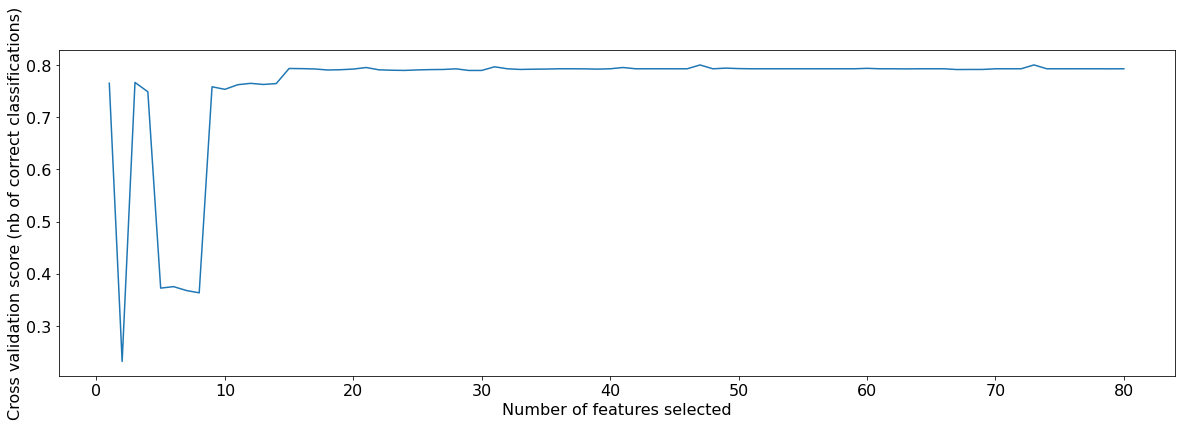

In [108]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [109]:
cols_keep = list(var_selected['variable'][0:50])
cols_keep

['euribor3m',
 'nr.employed',
 'nr.employed--log',
 'nr.employed/euribor3m',
 'nr.employed/euribor3m--log',
 'poly--1074',
 'poly--1099',
 'poly--1163',
 'poly--1175',
 'poly--123',
 'poly--1230',
 'poly--1234',
 'poly--124',
 'poly--132',
 'poly--133',
 'poly--1399',
 'poly--140',
 'poly--141',
 'poly--19',
 'poly--242',
 'poly--250',
 'poly--265',
 'poly--27',
 'poly--288',
 'poly--289',
 'poly--295',
 'poly--297',
 'poly--305',
 'poly--313',
 'poly--341',
 'poly--355',
 'poly--358',
 'poly--363',
 'poly--364',
 'poly--393',
 'poly--394',
 'poly--395',
 'poly--397',
 'poly--398',
 'poly--400',
 'poly--402',
 'poly--414',
 'poly--430',
 'poly--432',
 'poly--444',
 'poly--445',
 'poly--446',
 'poly--451',
 'poly--453',
 'poly--461']

In [110]:
X_train = X_train.filter(cols_keep, axis=1)
X_test = X_test.filter(cols_keep, axis=1)
X_train.shape

(32950, 50)

In [111]:
X_train

,euribor3m,nr.employed,nr.employed--log,nr.employed/euribor3m,nr.employed/euribor3m--log,poly--1074,poly--1099,poly--1163,poly--1175,poly--123,...,poly--402,poly--414,poly--430,poly--432,poly--444,poly--445,poly--446,poly--451,poly--453,poly--461
0,4.857,5191.0,8.554874,1068.766728,6.975196,7245.857664,9126.232830,35.769473,-1.880916,4852.143,...,268.237196,6.779644,86.645411,3362.115860,-176.7948,26946481.00,-513909.0,5.547968e+06,286682.990404,268.237196
1,4.857,5191.0,8.554874,1068.766728,6.975196,7245.857664,9126.232830,35.769473,-1.880916,4852.143,...,268.237196,6.779644,85.125316,3362.115860,-176.7948,26946481.00,-513909.0,5.547968e+06,286682.990404,268.237196
2,4.857,5191.0,8.554874,1068.766728,6.975196,7245.857664,9126.232830,35.769473,-1.880916,4852.143,...,268.237196,6.779644,131.139000,3362.115860,-176.7948,26946481.00,-513909.0,5.547968e+06,286682.990404,268.237196
3,4.857,5191.0,8.554874,1068.766728,6.975196,7245.857664,9126.232830,35.769473,-1.880916,4852.143,...,268.237196,6.779644,121.303575,3362.115860,-176.7948,26946481.00,-513909.0,5.547968e+06,286682.990404,268.237196
4,4.857,5191.0,8.554874,1068.766728,6.975196,7245.857664,9126.232830,35.769473,-1.880916,4852.143,...,268.237196,6.779644,86.645411,3362.115860,-176.7948,26946481.00,-513909.0,5.547968e+06,286682.990404,268.237196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,1.028,4963.6,8.510088,4828.404669,8.482478,6928.441360,8726.443706,7.508973,-0.551061,1026.972,...,53.843435,1.434934,28.527000,711.602863,-52.2224,24637324.96,-491396.4,2.396627e+07,259977.892726,53.843435
41182,1.028,4963.6,8.510088,4828.404669,8.482478,2551.290400,2481.800000,0.097629,-0.275531,9.252,...,53.843435,1.056784,0.319034,9.252000,-26.1112,24637324.96,44672.4,2.396627e+07,259977.892726,53.843435
41184,1.028,4963.6,8.510088,4828.404669,8.482478,6928.441360,8726.443706,7.508973,-0.551061,1026.972,...,53.843435,1.434934,22.325478,711.602863,-52.2224,24637324.96,-491396.4,2.396627e+07,259977.892726,53.843435
41185,1.028,4963.6,8.510088,4828.404669,8.482478,6928.441360,8726.443706,7.508973,-0.551061,1026.972,...,53.843435,1.434934,18.338786,711.602863,-52.2224,24637324.96,-491396.4,2.396627e+07,259977.892726,53.843435


In [112]:
X_train = X_train.filter(cols_keep, axis=1)
X_test = X_test.filter(cols_keep, axis=1)
X_train.shape

(32950, 50)

In [113]:
X_train

,euribor3m,nr.employed,nr.employed--log,nr.employed/euribor3m,nr.employed/euribor3m--log,poly--1074,poly--1099,poly--1163,poly--1175,poly--123,...,poly--402,poly--414,poly--430,poly--432,poly--444,poly--445,poly--446,poly--451,poly--453,poly--461
0,4.857,5191.0,8.554874,1068.766728,6.975196,7245.857664,9126.232830,35.769473,-1.880916,4852.143,...,268.237196,6.779644,86.645411,3362.115860,-176.7948,26946481.00,-513909.0,5.547968e+06,286682.990404,268.237196
1,4.857,5191.0,8.554874,1068.766728,6.975196,7245.857664,9126.232830,35.769473,-1.880916,4852.143,...,268.237196,6.779644,85.125316,3362.115860,-176.7948,26946481.00,-513909.0,5.547968e+06,286682.990404,268.237196
2,4.857,5191.0,8.554874,1068.766728,6.975196,7245.857664,9126.232830,35.769473,-1.880916,4852.143,...,268.237196,6.779644,131.139000,3362.115860,-176.7948,26946481.00,-513909.0,5.547968e+06,286682.990404,268.237196
3,4.857,5191.0,8.554874,1068.766728,6.975196,7245.857664,9126.232830,35.769473,-1.880916,4852.143,...,268.237196,6.779644,121.303575,3362.115860,-176.7948,26946481.00,-513909.0,5.547968e+06,286682.990404,268.237196
4,4.857,5191.0,8.554874,1068.766728,6.975196,7245.857664,9126.232830,35.769473,-1.880916,4852.143,...,268.237196,6.779644,86.645411,3362.115860,-176.7948,26946481.00,-513909.0,5.547968e+06,286682.990404,268.237196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,1.028,4963.6,8.510088,4828.404669,8.482478,6928.441360,8726.443706,7.508973,-0.551061,1026.972,...,53.843435,1.434934,28.527000,711.602863,-52.2224,24637324.96,-491396.4,2.396627e+07,259977.892726,53.843435
41182,1.028,4963.6,8.510088,4828.404669,8.482478,2551.290400,2481.800000,0.097629,-0.275531,9.252,...,53.843435,1.056784,0.319034,9.252000,-26.1112,24637324.96,44672.4,2.396627e+07,259977.892726,53.843435
41184,1.028,4963.6,8.510088,4828.404669,8.482478,6928.441360,8726.443706,7.508973,-0.551061,1026.972,...,53.843435,1.434934,22.325478,711.602863,-52.2224,24637324.96,-491396.4,2.396627e+07,259977.892726,53.843435
41185,1.028,4963.6,8.510088,4828.404669,8.482478,6928.441360,8726.443706,7.508973,-0.551061,1026.972,...,53.843435,1.434934,18.338786,711.602863,-52.2224,24637324.96,-491396.4,2.396627e+07,259977.892726,53.843435


## Now do a forward selection wrapper

In [114]:
nfeatures = len(X_train.columns)
sfs = SFS(LogisticRegression(random_state=1),
           k_features=nfeatures,
           forward=True,
           verbose=2,
           scoring = 'accuracy',
           cv = 2,
           n_jobs=-1)
sfs.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.8s finished

[2020-09-27 18:53:17] Features: 1/50 -- score: 0.8973899848254931[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of  49 | elapsed:    1.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:    1.8s finished

[2020-09-27 18:53:19] Features: 2/50 -- score: 0.8975417298937785[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    2.1s finished

[2020-09-27 18:53:21] Features: 3/50 -- score: 0.8975417298937785[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  47 | elapsed:    2.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed:    2.3s

[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    2.1s finished

[2020-09-27 18:54:37] Features: 37/50 -- score: 0.883308042488619[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    1.9s finished

[2020-09-27 18:54:39] Features: 38/50 -- score: 0.883308042488619[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    1.9s finished

[2020-09-27 18:54:41] Features: 39/50 -- score: 0.883308042488619[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    1.8s finished

[2020-09-27 18:54:42] Features: 40/50 -- score: 0.883308042488619[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concur

SequentialFeatureSelector(clone_estimator=True, cv=2,
                          estimator=LogisticRegression(C=1.0, class_weight=None,
                                                       dual=False,
                                                       fit_intercept=True,
                                                       intercept_scaling=1,
                                                       l1_ratio=None,
                                                       max_iter=100,
                                                       multi_class='auto',
                                                       n_jobs=None,
                                                       penalty='l2',
                                                       random_state=1,
                                                       solver='lbfgs',
                                                       tol=0.0001, verbose=0,
                                                       warm_start=False),
  

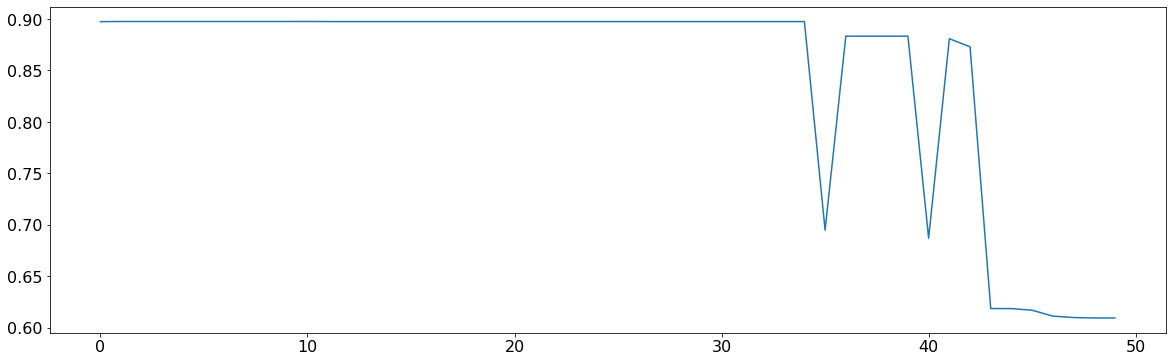

In [115]:
score_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
score_df
plt.figure()
plt.plot(range(nfeatures),score_df['avg_score'])
plt.show()

In [116]:
sorted_columns = list(score_df.loc[nfeatures,'feature_names'])
sorted_columns

['euribor3m',
 'nr.employed',
 'nr.employed--log',
 'nr.employed/euribor3m',
 'nr.employed/euribor3m--log',
 'poly--1074',
 'poly--1099',
 'poly--1163',
 'poly--1175',
 'poly--123',
 'poly--1230',
 'poly--1234',
 'poly--124',
 'poly--132',
 'poly--133',
 'poly--1399',
 'poly--140',
 'poly--141',
 'poly--19',
 'poly--242',
 'poly--250',
 'poly--265',
 'poly--27',
 'poly--288',
 'poly--289',
 'poly--295',
 'poly--297',
 'poly--305',
 'poly--313',
 'poly--341',
 'poly--355',
 'poly--358',
 'poly--363',
 'poly--364',
 'poly--393',
 'poly--394',
 'poly--395',
 'poly--397',
 'poly--398',
 'poly--400',
 'poly--402',
 'poly--414',
 'poly--430',
 'poly--432',
 'poly--444',
 'poly--445',
 'poly--446',
 'poly--451',
 'poly--453',
 'poly--461']

In [117]:
cols_keep = sorted_columns[0:30]

In [118]:
X_train = X_train.filter(cols_keep, axis=1)
X_test = X_test.filter(cols_keep, axis=1)
X_train.shape

(32950, 30)

In [119]:
X_train

,euribor3m,nr.employed,nr.employed--log,nr.employed/euribor3m,nr.employed/euribor3m--log,poly--1074,poly--1099,poly--1163,poly--1175,poly--123,...,poly--250,poly--265,poly--27,poly--288,poly--289,poly--295,poly--297,poly--305,poly--313,poly--341
0,4.857,5191.0,8.554874,1068.766728,6.975196,7245.857664,9126.232830,35.769473,-1.880916,4852.143,...,4.857,0.103497,4.857,456.528858,487922.8540,100457.659872,5191.0,4.857,0.103497,-176.7948
1,4.857,5191.0,8.554874,1068.766728,6.975196,7245.857664,9126.232830,35.769473,-1.880916,4852.143,...,4.857,0.103497,4.857,456.528858,487922.8540,100457.659872,5191.0,4.857,0.103497,-176.7948
2,4.857,5191.0,8.554874,1068.766728,6.975196,7245.857664,9126.232830,35.769473,-1.880916,4852.143,...,4.857,0.103497,4.857,456.528858,487922.8540,100457.659872,5191.0,4.857,0.103497,-176.7948
3,4.857,5191.0,8.554874,1068.766728,6.975196,7245.857664,9126.232830,35.769473,-1.880916,4852.143,...,4.857,0.103497,4.857,456.528858,487922.8540,100457.659872,5191.0,4.857,0.103497,-176.7948
4,4.857,5191.0,8.554874,1068.766728,6.975196,7245.857664,9126.232830,35.769473,-1.880916,4852.143,...,4.857,0.103497,4.857,456.528858,487922.8540,100457.659872,5191.0,4.857,0.103497,-176.7948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,1.028,4963.6,8.510088,4828.404669,8.482478,6928.441360,8726.443706,7.508973,-0.551061,1026.972,...,1.028,-0.104348,1.028,97.420476,470385.4812,457573.425292,4963.6,1.028,-0.104348,-52.2224
41182,1.028,4963.6,8.510088,4828.404669,8.482478,2551.290400,2481.800000,0.097629,-0.275531,9.252,...,1.028,-11.582633,1.028,97.420476,470385.4812,457573.425292,4963.6,1.028,-11.582633,-52.2224
41184,1.028,4963.6,8.510088,4828.404669,8.482478,6928.441360,8726.443706,7.508973,-0.551061,1026.972,...,1.028,-0.104348,1.028,97.420476,470385.4812,457573.425292,4963.6,1.028,-0.104348,-52.2224
41185,1.028,4963.6,8.510088,4828.404669,8.482478,6928.441360,8726.443706,7.508973,-0.551061,1026.972,...,1.028,-0.104348,1.028,97.420476,470385.4812,457573.425292,4963.6,1.028,-0.104348,-52.2224


# Model

### Model Training and Validation

In [120]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [121]:
results_train = y_train.copy()
results_train.columns = ['y_actual']
results_test = y_test.copy()
results_test.columns = ['y_actual']

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

In [122]:
X_train.shape

(32950, 30)

In [123]:
X_test.shape

(8238, 30)

In [124]:
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV

gbk = GradientBoostingClassifier() #n_estimators=800, learning_rate=.05, max_depth=3
logreg = LogisticRegression(solver='lbfgs')
random_forest = RandomForestClassifier(n_estimators=100, max_depth=4)
gaussian = GaussianNB()
xgb = XGBClassifier()
decision_tree = DecisionTreeClassifier(criterion='gini',max_depth = 20,min_samples_leaf = 150, min_samples_split=400)

In [125]:
models = [logreg, random_forest, gbk, gaussian, xgb, decision_tree]
model_names = ['Logistic Regression', 'Random Forest','GradientBoost', 
               'Naive Bayes', 'XGB','Decision Tree']
model_parameters = {
    'Logistic Regression': {"C": [.0001,.001,.01]},
    'Random Forest': {"max_depth": [10,20,30,40],'n_estimators':[80,120]},
    'GradientBoost':{'n_estimators':[200,400,800],'min_samples_split':[2,20,50]},#'learning_rate':[0.02,0.05,0.08],'max_depth':[2,3,4]
    'Naive Bayes': {"var_smoothing": [.1, 1, 5, 10]},
    'XGB': {"max_depth": [3, 4, 5],'learning_rate':[0.05,0.1,.5]},
    'Decision Tree': {"max_depth": [10, 20, 30],"min_samples_leaf":[50,100,200]}}

In [126]:
validation_scores = {}
cv_scores = {}
finetuned_models = {}
solution_matrix = pd.DataFrame(index=np.arange(len(X_test)))

In [127]:
#find the best params for several models
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
for j in range(len(models)):
    model = models[j]
    model_name = model_names[j]
    model_parameter = model_parameters[model_name]
    print(model_name)
    
    gridsearch = GridSearchCV(model, model_parameter, cv=skf, scoring="accuracy")
    gridsearch.fit(X_train, y_train)
    cv_score, finetuned_model = gridsearch.best_score_, gridsearch.best_estimator_
    
    finetuned_models[model_name] = finetuned_model
    cv_scores[model_name] = cv_score
    print("best_params:", gridsearch.best_params_, "best_score:", round(cv_score, 4))
    results_train[model_name] = finetuned_model.predict_proba(X_train)[:,1]
    results_test[model_name] = finetuned_model.predict_proba(X_test)[:,1]
    solution_matrix[model_name] = finetuned_model.predict(X_test)
    validation_scores[model_name] = accuracy_score(y_test, solution_matrix[model_name])

Logistic Regression
best_params: {'C': 0.001} best_score: 0.9001
Random Forest
best_params: {'max_depth': 10, 'n_estimators': 120} best_score: 0.8994
GradientBoost
best_params: {'min_samples_split': 50, 'n_estimators': 200} best_score: 0.8999
Naive Bayes
best_params: {'var_smoothing': 5} best_score: 0.8831
XGB
best_params: {'learning_rate': 0.1, 'max_depth': 3} best_score: 0.9007
Decision Tree
best_params: {'max_depth': 5, 'min_samples_leaf': 200} best_score: 0.8999


In [128]:
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict_proba(X_test)[:,1]

LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

In [129]:
results_train['logreg'] = logmodel.predict_proba(X_train)[:,1]
results_test['logreg'] = logpred

In [130]:
# find a good k for knn
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

#Neighbors
neighbors = np.arange(50,100,5)

#Create empty dataframe that will hold cv scores
knn_summary=pd.DataFrame(index=neighbors,columns=['roc_auc','std'])

#Perform 3-fold cross validation on training set for different values of k:
for k_value in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, n_jobs=-1)
    scores = cross_val_score(knn, X_train, y_train, cv=k_fold, scoring='roc_auc')
    knn_summary.loc[k_value,:]=[scores.mean()*100,scores.std()*100]
    print(k_value)

40
45
50
55
60
65
70
75


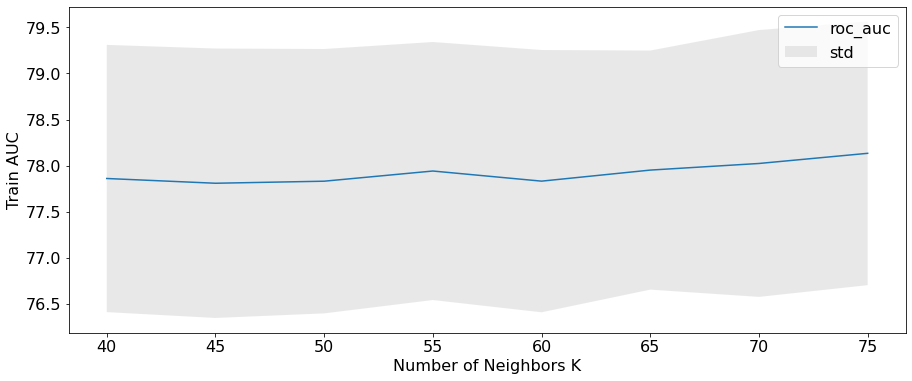

In [131]:
plt.figure(figsize=(15,6))
plt.plot(neighbors, knn_summary['roc_auc'],label='roc_auc')
plt.fill_between(neighbors,
                 (knn_summary['roc_auc']-knn_summary['std']).values.tolist(),
                 (knn_summary['roc_auc']+knn_summary['std']).values.tolist(),
                 facecolor='lightgrey', alpha=0.5, label='std')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train AUC')
plt.legend()
plt.show()

In [132]:
optimal_k = 60
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
KNNCV = (cross_val_score(knn, X_train, y_train, cv=k_fold, n_jobs=-1, scoring = 'accuracy').mean())
results_train['knn'] = knn.predict_proba(X_train)[:,1]
results_test['knn'] = knn.predict_proba(X_test)[:,1]
print(KNNCV)

0.8990895295902883


In [133]:
# sometimes comment this cell out and set the SVC results to knn in the next cell, just to save time
# svc= SVC(kernel = 'rbf', probability=True)
# svc.fit(X_train, y_train)
# SVCCV = (cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=-1, scoring = 'accuracy').mean())
# results_train['svc'] = svc.predict_proba(X_train)[:,1]
# results_test['svc'] =svc.predict_proba(X_test)[:,1]
# print(SVCCV)
results_train['svc'] = knn.predict_proba(X_train)[:,1]
results_test['svc'] = knn.predict_proba(X_test)[:,1]

In [134]:
dtree = DecisionTreeClassifier(criterion='gini',max_depth = 15,min_samples_leaf = 150, min_samples_split=100) #criterion = entopy, gini
dtree.fit(X_train, y_train)
DTREECV = (cross_val_score(dtree, X_train, y_train, cv=k_fold, n_jobs=-1, scoring = 'accuracy').mean())
results_train['dtree'] = dtree.predict_proba(X_train)[:,1]
results_test['dtree'] = dtree.predict_proba(X_test)[:,1]
DTREECV

0.8999089529590287


In [135]:
rfc = RandomForestClassifier(n_estimators = 100,min_samples_split=100,min_samples_leaf=50,)#criterion = entopy,gini
rfc.fit(X_train, y_train)
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=-1, scoring = 'accuracy').mean())
results_train['rfc'] = rfc.predict_proba(X_train)[:,1]
results_test['rfc'] = rfc.predict_proba(X_test)[:,1]
RFCCV

0.8997268588770865


In [136]:
gaussiannb= GaussianNB()
gaussiannb.fit(X_train, y_train)
gaussiannbpred = gaussiannb.predict_proba(X_test)[:,1]
probs = gaussiannb.predict_proba(X_test)[:,1]
GAUSSIANCV = (cross_val_score(gaussiannb, X_train, y_train, cv=k_fold, n_jobs=-1, scoring = 'accuracy').mean())
results_train['NB'] = gaussiannb.predict_proba(X_train)[:,1]
results_test['NB'] = gaussiannbpred
GAUSSIANCV

0.7165098634294385

In [137]:
xgb = XGBClassifier(max_depth=3,eval_metric='auc',min_child_weight=5,learning_weight=.1)
xgb.fit(X_train, y_train)
XGBCV = (cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 3).mean())
results_train['xgb'] = xgb.predict_proba(X_train)[:,1]
results_test['xgb'] = xgb.predict_proba(X_test)[:,1]
XGBCV

0.3610462140865829

In [138]:
gbk = GradientBoostingClassifier(n_estimators=800, learning_rate=.05, max_depth=3)
gbk.fit(X_train, y_train)
gbkpred = gbk.predict_proba(X_test)[:,1]
GBKCV = (cross_val_score(gbk, X_train, y_train, cv=k_fold, n_jobs=-1, scoring = 'accuracy').mean())
results_train['GBT'] = gbk.predict_proba(X_train)[:,1]
results_test['GBT'] = gbkpred
GBKCV

0.8986646433990895


In [139]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(hidden_layer_sizes=(8,3))
NNCV = (cross_val_score(nn, X_train, y_train, cv=k_fold, n_jobs=-1, scoring = 'roc_auc').mean())
nn.fit(X_train,y_train)
results_train['nn'] = nn.predict_proba(X_train)[:,1]
results_test['nn'] = nn.predict_proba(X_test)[:,1]
NNCV

0.77925657846085


In [140]:
validation_scores

{'Logistic Regression': 0.896698227725176,
 'Random Forest': 0.8963340616654528,
 'GradientBoost': 0.8979121145909201,
 'Naive Bayes': 0.8844379703811605,
 'XGB': 0.8983976693372178,
 'Decision Tree': 0.8986404467103666}

In [141]:
results_train.head(10)

,y_actual,Logistic Regression,Random Forest,GradientBoost,Naive Bayes,XGB,Decision Tree,logreg,knn,svc,dtree,rfc,NB,xgb,GBT,nn
0,0,0.052159,0.025183,0.031701,0.000240,0.029394,0.024418,0.040455,0.033333,0.033333,0.015957,0.026515,1.816091e-14,0.027200,0.028498,0.036198
1,0,0.052116,0.024810,0.031701,0.000242,0.028032,0.024418,0.040317,0.016667,0.016667,0.015957,0.031769,1.917223e-14,0.027200,0.026442,0.036027
2,0,0.053428,0.014308,0.031701,0.000186,0.029394,0.024418,0.044687,0.000000,0.000000,0.000000,0.001697,3.964927e-15,0.022341,0.028251,0.032955
3,0,0.053145,0.019237,0.031701,0.000197,0.029394,0.024418,0.043717,0.000000,0.000000,0.004082,0.015704,5.491255e-15,0.020970,0.028251,0.033821
4,0,0.052159,0.025183,0.031701,0.000240,0.029394,0.024418,0.040455,0.033333,0.033333,0.015957,0.026515,1.816091e-14,0.027200,0.028498,0.036198
6,0,0.052035,0.055532,0.031701,0.000246,0.034038,0.024418,0.040057,0.050000,0.050000,0.053333,0.053377,2.125803e-14,0.034881,0.030662,0.035704
7,0,0.053061,0.024776,0.031701,0.000200,0.029394,0.024418,0.043429,0.050000,0.050000,0.033113,0.037949,6.063659e-15,0.030601,0.028516,0.034085
8,0,0.055515,0.104096,0.030623,0.000125,0.053060,0.024418,0.052329,0.066667,0.066667,0.037267,0.053575,4.521076e-16,0.027318,0.032892,0.036320
10,0,0.053061,0.024776,0.031701,0.000200,0.029394,0.024418,0.043429,0.050000,0.050000,0.033113,0.037949,6.063659e-15,0.030601,0.028516,0.034085
11,0,0.055274,0.072287,0.030623,0.000130,0.053060,0.024418,0.051400,0.033333,0.033333,0.037267,0.048067,5.696949e-16,0.024353,0.032892,0.034890


In [142]:
results_test.head(10)

,y_actual,Logistic Regression,Random Forest,GradientBoost,Naive Bayes,XGB,Decision Tree,logreg,knn,svc,dtree,rfc,NB,xgb,GBT,nn
5,0,0.052760,0.026360,0.031701,0.000212,0.029394,0.024418,0.042419,0.050000,0.050000,0.040359,0.033028,8.665339e-15,0.035347,0.029765,0.035042
9,0,0.055274,0.072287,0.030623,0.000130,0.053060,0.024418,0.051400,0.033333,0.033333,0.037267,0.048067,5.696949e-16,0.024353,0.032892,0.034890
13,0,0.052116,0.024810,0.031701,0.000242,0.028032,0.024418,0.040317,0.016667,0.016667,0.015957,0.031769,1.917223e-14,0.027200,0.026442,0.036027
15,0,0.052250,0.028121,0.031701,0.000235,0.029394,0.024418,0.040747,0.050000,0.050000,0.029289,0.039286,1.620540e-14,0.027200,0.028498,0.036561
16,0,0.053645,0.014533,0.031701,0.000178,0.029394,0.024418,0.045440,0.000000,0.000000,0.009756,0.001748,3.106336e-15,0.026262,0.028251,0.032310
17,0,0.052693,0.024961,0.031701,0.000215,0.029394,0.024418,0.042197,0.016667,0.016667,0.015106,0.023898,9.391758e-15,0.025046,0.027752,0.035259
18,0,0.052453,0.025992,0.031701,0.000226,0.029394,0.024418,0.041408,0.033333,0.033333,0.029289,0.032624,1.258494e-14,0.027200,0.028498,0.036050
31,0,0.052035,0.055532,0.031701,0.000246,0.034038,0.024418,0.040057,0.050000,0.050000,0.053333,0.053377,2.125803e-14,0.034881,0.030662,0.035704
37,0,0.052348,0.025114,0.031701,0.000231,0.029394,0.024418,0.041063,0.050000,0.050000,0.029289,0.021656,1.434468e-14,0.027200,0.028498,0.036405
38,0,0.053061,0.024776,0.031701,0.000200,0.029394,0.024418,0.043429,0.050000,0.050000,0.033113,0.037949,6.063659e-15,0.030601,0.028516,0.034085


In [143]:
models = pd.DataFrame({
                'Models': ['Random Forest Classifier', 'Decision Tree Classifier', 'Support Vector Machine',
                           'K-Near Neighbors', 'Logistic Model', 'Gaussian NB', 'XGBoost', 'Gradient Boosting', 'NN'],
                'AUC':  [RFCCV, DTREECV, KNNCV, KNNCV, LOGCV, GAUSSIANCV, XGBCV, GBKCV, NNCV]})

models.sort_values(by='AUC', ascending=False)

,Models,AUC
1,Decision Tree Classifier,0.899909
0,Random Forest Classifier,0.899727
4,Logistic Model,0.899575
2,Support Vector Machine,0.899090
3,K-Near Neighbors,0.899090
7,Gradient Boosting,0.898665
8,NN,0.779257
5,Gaussian NB,0.716510
6,XGBoost,0.361046


In [144]:
modelNameDict={
    "Logistic Regression": 'logreg',
    "K-Nearest Neighbors": 'knn',
#     "Support Vector Machine": 'svc',
    "Decision Tree": 'dtree',
    "Random Forest": 'rfc',
    "Gaussian NB": 'NB',
    "XGBoost": 'xgb',
    "Gradient Boosting": 'GBT',
    "Neural Network": 'nn'   
}
modelDict={
    "Logistic Regression": logmodel,
    "K-Nearest Neighbors": knn,
#     "Support Vector Machine": svc,
    "Decision Tree": dtree,
    "Random Forest": rfc,
    "Gaussian NB": gaussiannb,
    "XGBoost": xgb,
    "Gradient Boosting": gbk,
    "Neural Network":nn
}
modelScoreDict={
    "Logistic Regression": LOGCV,
    "K-Nearest Neighbors": KNNCV,
#     "Support Vector Machine": SVCCV,
    "Decision Tree": DTREECV,
    "Random Forest": RFCCV,
    "Gaussian NB": GAUSSIANCV,
    "XGBoost": XGBCV,
    "Gradient Boosting": GBKCV,
    "Neural Network": NNCV
}

model_scores=pd.DataFrame.from_dict(modelScoreDict,orient='index')
model_scores.columns=['AUC']
model_scores.sort_values('AUC',ascending=False)

,AUC
Decision Tree,0.899909
Random Forest,0.899727
Logistic Regression,0.899575
K-Nearest Neighbors,0.899090
Gradient Boosting,0.898665
Neural Network,0.779257
Gaussian NB,0.716510
XGBoost,0.361046


In [145]:
from sklearn import metrics

def draw_auc_curve(ax, model_name, modelNameDict, results):
    preds=results[modelNameDict[model_name]]
    y=results['y_actual']
    fpr, tpr, threshold = metrics.roc_curve(y,preds)
    roc_auc=metrics.auc(fpr,tpr)
    
    ax.plot(fpr,tpr,'b',label=f"AUC={roc_auc:.3f}")
    ax.plot([0, 1], [0, 1],'r--')
    ax.set_title(f"ROC {model_name}",fontsize=20)
    ax.set_ylabel('True Positive Rate',fontsize=20)
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.legend(loc = 'lower right', prop={'size': 16})

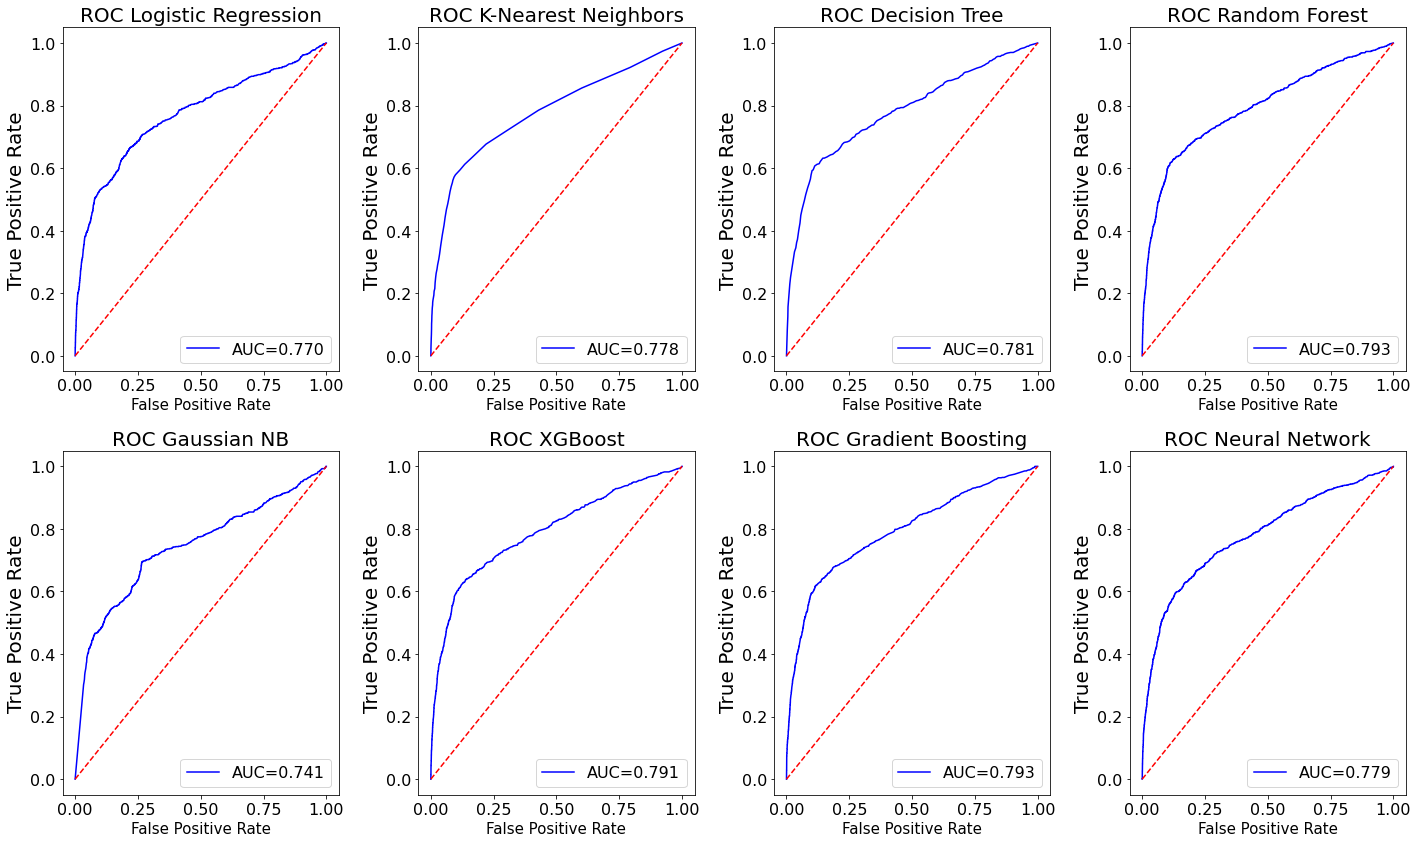

In [146]:
n_col=4
n_row=int(math.ceil(len(modelDict)/n_col))

fig, ax_arr = plt.subplots(nrows = n_row, ncols = n_col, figsize = (20,n_row*6))
for i, (model_name,model) in enumerate(modelDict.items()):
    i_row=i//n_col
    i_col=i%n_col
    draw_auc_curve(ax_arr[i_row,i_col], model_name, modelNameDict, results_test)

plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 

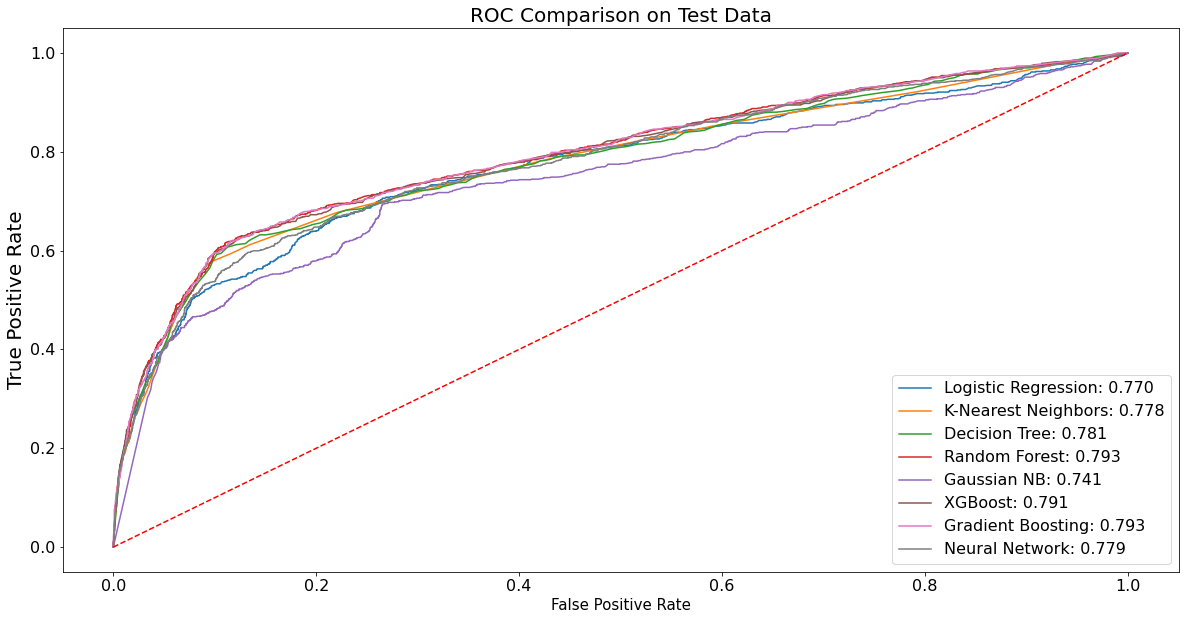

In [147]:
plt.figure(figsize=(20,10))
for model_name, col_name in modelNameDict.items():
    preds=results_test[col_name]
    fpr, tpr, threshold = metrics.roc_curve(y_test,preds)
    roc_auc=metrics.auc(fpr,tpr)
    plt.plot(fpr,tpr,label=f"{model_name}: {roc_auc:.3f}")

plt.plot([0, 1], [0, 1],'r--')
ax=plt.gca()
ax.set_title("ROC Comparison on Test Data",fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})
plt.show()

## look at what variables are the most important for the different models

In [148]:
def feature_importance_plot(model,title):
    feature_importance = pd.DataFrame({'Importance':model.feature_importances_*100},index = cols_keep)\
                    .sort_values(by='Importance')
    feature_importance[-15:].plot(kind='barh')
    plt.title(title);

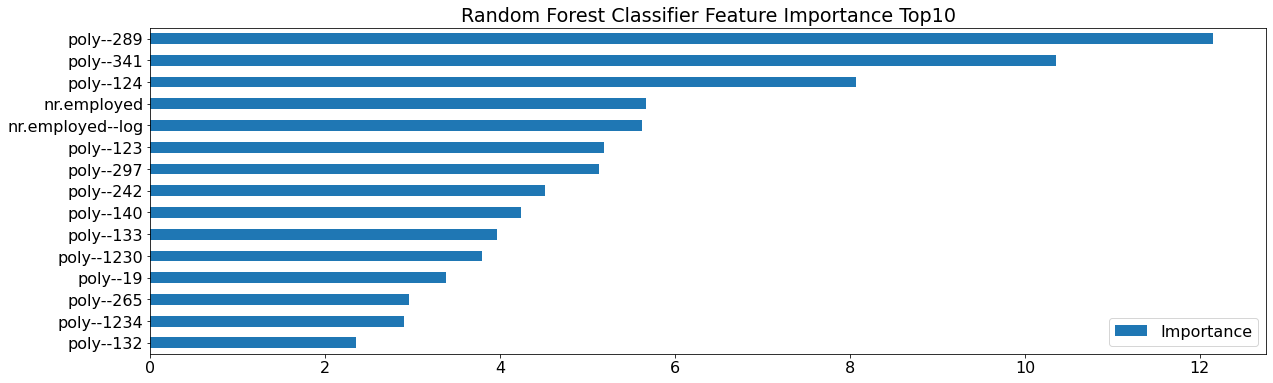

In [149]:
feature_importance_plot(rfc,'Random Forest Classifier Feature Importance Top10')

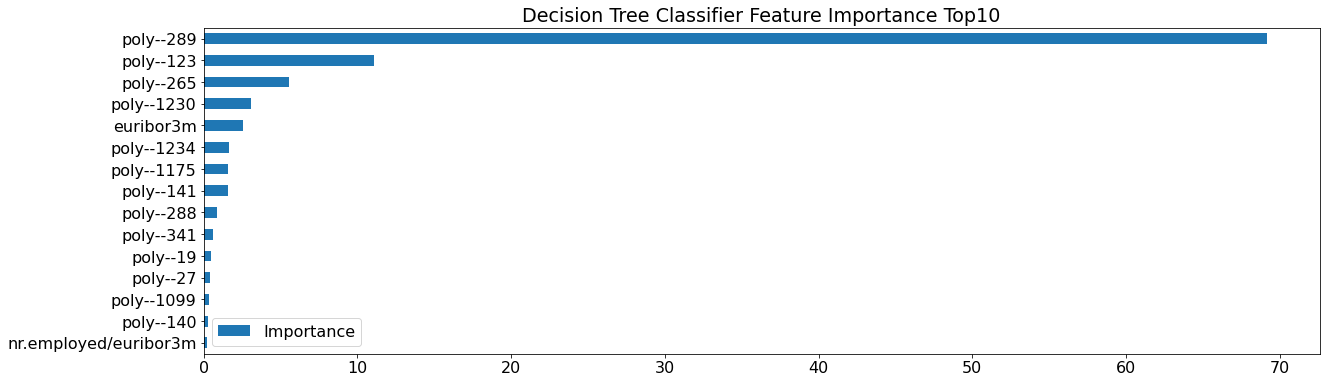

In [150]:
feature_importance_plot(dtree,'Decision Tree Classifier Feature Importance Top10')

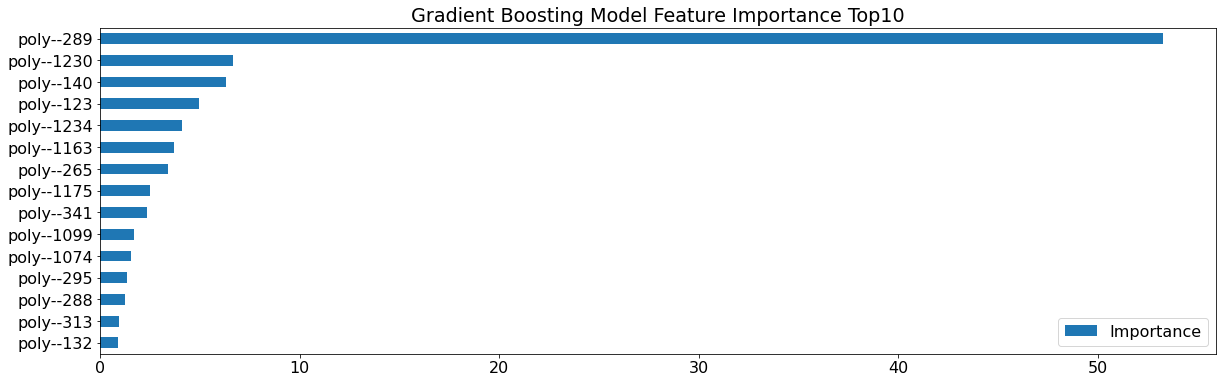

In [151]:
feature_importance_plot(gbk,'Gradient Boosting Model Feature Importance Top10')

In [152]:
print("Train set response rate:", y_train.mean().values[0])
print("Test set response rate:", y_test.mean().values[0])

Train set response rate: 0.11171471927162367
Test set response rate: 0.1164117504248604


In [153]:
def generate_summary(y_actual_sorted, num_bins, cost_per_contact, revenue_per_good):
    cols = ['tot recs','bin recs','#g','#b','%g','%b','cg','cb','%cg','%cb','KS',
            'bin resp rate','cum resp rate','bin lift','cum lift','cost','revenue','profit']
    df = pd.DataFrame(index=range(1,num_bins+1), columns = cols)

    chunk=round(len(y_actual_sorted)/num_bins)
    tot_goods=sum(y_actual_sorted)
    tot_bads=len(y_actual_sorted)-sum(y_actual_sorted)
    avg_resp_rate=y_actual_sorted.mean()*100

    bins=[]
    goods=[]
    for i in range(num_bins):
        if i==num_bins-1:
            cur_bin=y_actual_sorted[i*chunk:]
        else:
            cur_bin=y_actual_sorted[i*chunk:(i+1)*chunk]
        bins.append(len(cur_bin))
        goods.append(sum(cur_bin))

    df['bin recs']=bins
    df['tot recs']=df['bin recs'].cumsum()
    df['#g']=goods
    df['#b']=df['bin recs']-df['#g']
    df['%g']=df['#g']/df['bin recs']*100
    df['%b']=100-df['%g']
    df['cg']=df['#g'].cumsum()
    df['cb']=df['#b'].cumsum()
    df['%cg']=df['cg']/tot_goods*100
    df['%cb']=df['cb']/tot_bads*100
    df['KS']=df['%cg']-df['%cb']
    df['bin resp rate']=df['%g']
    df['cum resp rate']=df['cg']/df['tot recs']*100
    df['bin lift']=df['bin resp rate']/avg_resp_rate
    df['cum lift']=df['cum resp rate']/avg_resp_rate
    df['cost']=cost_per_contact*df['tot recs']
    df['revenue']=revenue_per_good*df['cg']
    df['profit']=df['revenue']-df['cost']
    df.index.name='bin'
    df=df.reset_index()
    return df

In [154]:
cost_per_contact = 3
revenue_per_good = 40
num_bins=100

summary_tbs_trn={}
summary_tbs_tst={}
cols_eval = modelNameDict.values()
for col_eval in cols_eval:
    y_train_sorted=results_train.sort_values(col_eval,ascending=False)['y_actual'].values
    summary_tbs_trn[col_eval]=generate_summary(y_train_sorted, num_bins, cost_per_contact, revenue_per_good)

    y_test_sorted=results_test.sort_values(col_eval,ascending=False)['y_actual'].values
    summary_tbs_tst[col_eval]=generate_summary(y_test_sorted, num_bins, cost_per_contact, revenue_per_good)

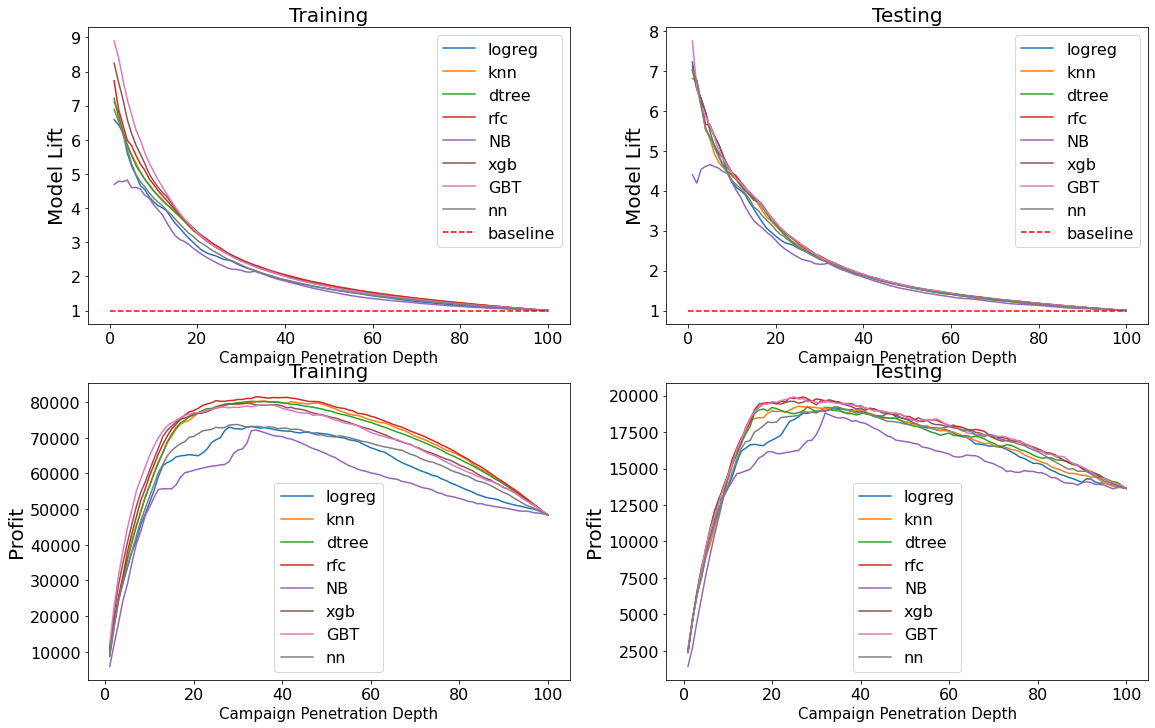

In [155]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (19,12))

for col_eval in cols_eval:
    temp1=summary_tbs_trn[col_eval]
    ax1.plot(temp1['bin'],temp1['cum lift'],label=col_eval)
    
    temp2=summary_tbs_tst[col_eval]
    ax2.plot(temp2['bin'],temp2['cum lift'],label=col_eval)
    
    temp3=summary_tbs_trn[col_eval]
    ax3.plot(temp3['bin'],temp3['profit'],label=col_eval)
    
    temp4=summary_tbs_tst[col_eval]
    ax4.plot(temp4['bin'],temp4['profit'],label=col_eval)
    
ax1.plot([0, 100], [1, 1],'r--',label='baseline')
ax1.legend()
ax1.set_title('Training',fontsize=20)
ax1.set_ylabel('Model Lift',fontsize=20)
ax1.set_xlabel('Campaign Penetration Depth',fontsize=15)

ax2.plot([0, 100], [1, 1],'r--',label='baseline')
ax2.legend()
ax2.set_title('Testing',fontsize=20)
ax2.set_ylabel('Model Lift',fontsize=20)
ax2.set_xlabel('Campaign Penetration Depth',fontsize=15)

ax3.set_title('Training',fontsize=20)
ax3.set_ylabel('Profit',fontsize=20)
ax3.set_xlabel('Campaign Penetration Depth',fontsize=15)
ax3.legend()

ax4.set_title('Testing',fontsize=20)
ax4.set_ylabel('Profit',fontsize=20)
ax4.set_xlabel('Campaign Penetration Depth',fontsize=15)
ax4.legend()

plt.show()

In [156]:
ith_bin=20
model_summary=pd.DataFrame(index=cols_eval,columns=['max_profit',f'{ith_bin}th_bin_lift'])

for col_eval in cols_eval:
    temp=summary_tbs_tst[col_eval]
    model_summary.loc[col_eval,:]=[temp['profit'].max(),
                                   temp[temp['bin']==ith_bin]['cum lift'].values[0]]

model_summary.sort_values('max_profit',ascending=False)

,max_profit,20th_bin_lift
GBT,19930,3.21085
rfc,19918,3.20037
xgb,19712,3.20561
knn,19284,3.12704
nn,19236,3.02228
dtree,19232,3.15847
logreg,19208,2.86515
NB,18808,2.76039


In [157]:
col_eval='GBT'
lift_trn=summary_tbs_trn[col_eval]
lift_tst=summary_tbs_tst[col_eval]
lift_tst.to_csv('lift_table_test.csv')
lift_tst.head(10)

,bin,tot recs,bin recs,#g,#b,%g,%b,cg,cb,%cg,%cb,KS,bin resp rate,cum resp rate,bin lift,cum lift,cost,revenue,profit
0,1,82,82,74,8,90.243902,9.756098,74,8,7.716371,0.109905,7.606466,90.243902,90.243902,7.752130,7.752130,246,2960,2714
1,2,164,82,52,30,63.414634,36.585366,126,38,13.138686,0.522050,12.616636,63.414634,76.829268,5.447443,6.599786,492,5040,4548
2,3,246,82,49,33,59.756098,40.243902,175,71,18.248175,0.975409,17.272766,59.756098,71.138211,5.133167,6.110913,738,7000,6262
3,4,328,82,49,33,59.756098,40.243902,224,104,23.357664,1.428768,21.928897,59.756098,68.292683,5.133167,5.866477,984,8960,7976
4,5,410,82,45,37,54.878049,45.121951,269,141,28.050052,1.937079,26.112973,54.878049,65.609756,4.714133,5.636008,1230,10760,9530
5,6,492,82,37,45,45.121951,54.878049,306,186,31.908238,2.555296,29.352942,45.121951,62.195122,3.876065,5.342684,1476,12240,10764
6,7,574,82,29,53,35.365854,64.634146,335,239,34.932221,3.283418,31.648803,35.365854,58.362369,3.037997,5.013443,1722,13400,11678
7,8,656,82,32,50,39.024390,60.975610,367,289,38.269030,3.970326,34.298705,39.024390,55.945122,3.352272,4.805797,1968,14680,12712
8,9,738,82,30,52,36.585366,63.414634,397,341,41.397289,4.684709,36.712579,36.585366,53.794038,3.142755,4.621014,2214,15880,13666
9,10,820,82,28,54,34.146341,65.853659,425,395,44.316997,5.426570,38.890427,34.146341,51.829268,2.933238,4.452237,2460,17000,14540


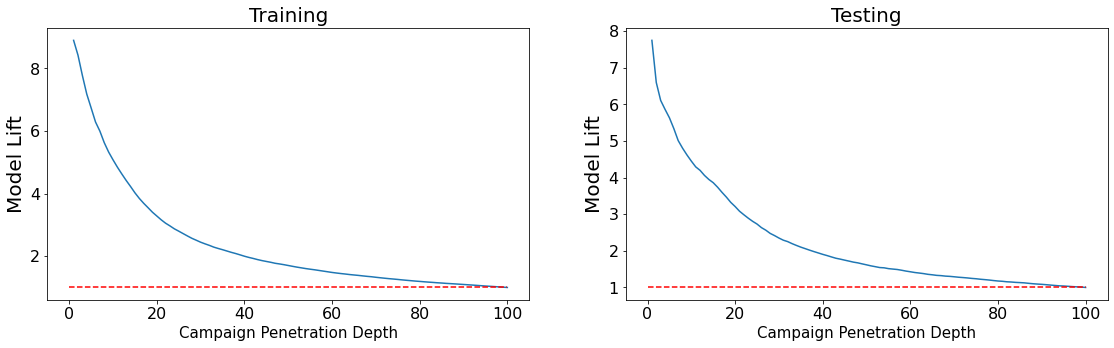

In [158]:
fig, (ax, ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = (19,5))

ax.plot(lift_trn['bin'], lift_trn['cum lift'])
ax.plot([0, 100], [1, 1],'r--')
ax.set_title('Training',fontsize=20)
ax.set_ylabel('Model Lift',fontsize=20)
ax.set_xlabel('Campaign Penetration Depth',fontsize=15)

ax1.plot(lift_tst['bin'], lift_tst['cum lift'])
ax1.plot([0, 100], [1, 1],'r--')
ax1.set_title('Testing',fontsize=20)
ax1.set_ylabel('Model Lift',fontsize=20)
ax1.set_xlabel('Campaign Penetration Depth',fontsize=15)

plt.show()

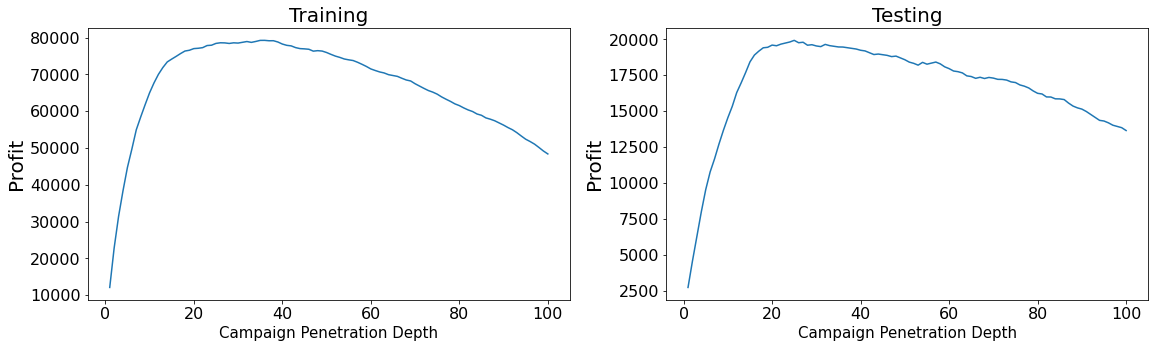

In [159]:
fig, (ax, ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = (19,5))

ax.plot(lift_trn['bin'], lift_trn['profit'])
ax.set_title('Training',fontsize=20)
ax.set_ylabel('Profit',fontsize=20)
ax.set_xlabel('Campaign Penetration Depth',fontsize=15)

ax1.plot(lift_tst['bin'], lift_tst['profit'])
ax1.set_title('Testing',fontsize=20)
ax1.set_ylabel('Profit',fontsize=20)
ax1.set_xlabel('Campaign Penetration Depth',fontsize=15)

plt.show()

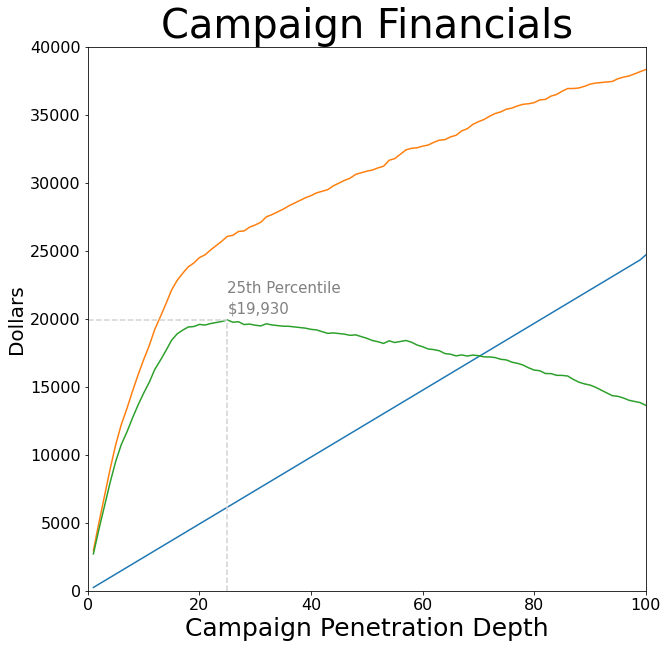

In [160]:
max_profit=lift_tst['profit'].max()
best_bin=lift_tst[lift_tst['profit']==max_profit]['bin'].values[0]

fig, ax = plt.subplots(figsize = (10,10))

ax.plot(lift_tst['bin'], lift_tst['cost'])
ax.plot(lift_tst['bin'], lift_tst['revenue'])
ax.plot(lift_tst['bin'], lift_tst['profit'])
ax.plot([best_bin,best_bin],[0,max_profit],color='lightgrey',linestyle='--')
ax.plot([0,best_bin],[max_profit,max_profit],color='lightgrey',linestyle='--')
ax.annotate(f"${max_profit:,.0f}",[best_bin,max_profit+500],fontsize=15,color='grey')
ax.annotate(f"{best_bin}th Percentile",[best_bin,max_profit+2000],fontsize=15,color='grey')
ax.set_title('Campaign Financials',fontsize=40)
ax.set_ylabel('Dollars',fontsize=20)
ax.set_xlabel('Campaign Penetration Depth',fontsize=25)
ax.set_xlim(0,100)
ax.set_ylim(0,40000)
plt.savefig('financials.png')

In [161]:
ith_bin=20

print('Best model is',col_eval)
print(f"\tMaximum profit is ${lift_tst['profit'].max():,.1f}",)
print(f"\tLift at the {ith_bin}th bin is {lift_tst[lift_tst['bin']==ith_bin]['cum lift'].values[0]:.2f}")

Best model is GBT
	Maximum profit is $19,930.0
	Lift at the 20th bin is 3.21


In [162]:
print('Notebook duration: ',datetime.now() - start_time)

Notebook duration:  0:39:50.469025
